# Tutorial: Foundations of autonomic nervous system activity analysis 
## Transformative Technology Conference 2018
## Watson Ξ 2018.11.10

This notebook is a tutorial on some basic analysis (and data plumbling) of biometric data from a bluetooth heart rate strap, which delivers RRI (R-peak to R-peak heart beat interval) data on a beat by beat basis. This data can be analyzed and compared with conditions under which it was gathered to begin to understand how to infer subjective cognitive and emotional state through dynamic physiological biometric proxy signals. 

Technical recommedations:
* Polar chest strap
* Jupyter notebook via Anaconda Python distribution

In [178]:
import json
import numpy as np
import pandas as pd

In [179]:
# set up some plotting configuration
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(21, 9)) #set figure size

plt.rcParams['axes.facecolor'] = 'black'
mpl.rcParams['text.color'] = 'yellow'

# Read in RRI data and plot
### (first take a look at the data file)

In [180]:
data_json = json.load(open('labeled_data_RRI.json','r'))

print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('collect #','condition','length','minimum','maximum'))
for k in data_json.keys():
    for l in data_json[k].keys():
        print("{:<10} {:<10} {:<10} {:<10} {:<10}".format(k,l,len(data_json[k][l]['data']),min(data_json[k][l]['data']),max(data_json[k][l]['data'])))

collect #  condition  length     minimum    maximum   
collect1   pre        298        601        888       
collect1   ex1        298        626        969       
collect1   ex2        298        606        1009      
collect1   post       298        599        981       
collect2   pre        298        576        957       
collect2   ex1        298        299        1150      
collect2   ex2        298        546        998       
collect2   post       298        625        1114      
collect3   pre        298        606        943       
collect3   ex1        298        565        969       
collect3   ex2        298        571        1039      
collect3   post       298        576        1010      
collect4   pre        298        587        838       
collect4   ex1        298        580        898       
collect4   ex2        298        570        938       
collect4   post       298        610        953       


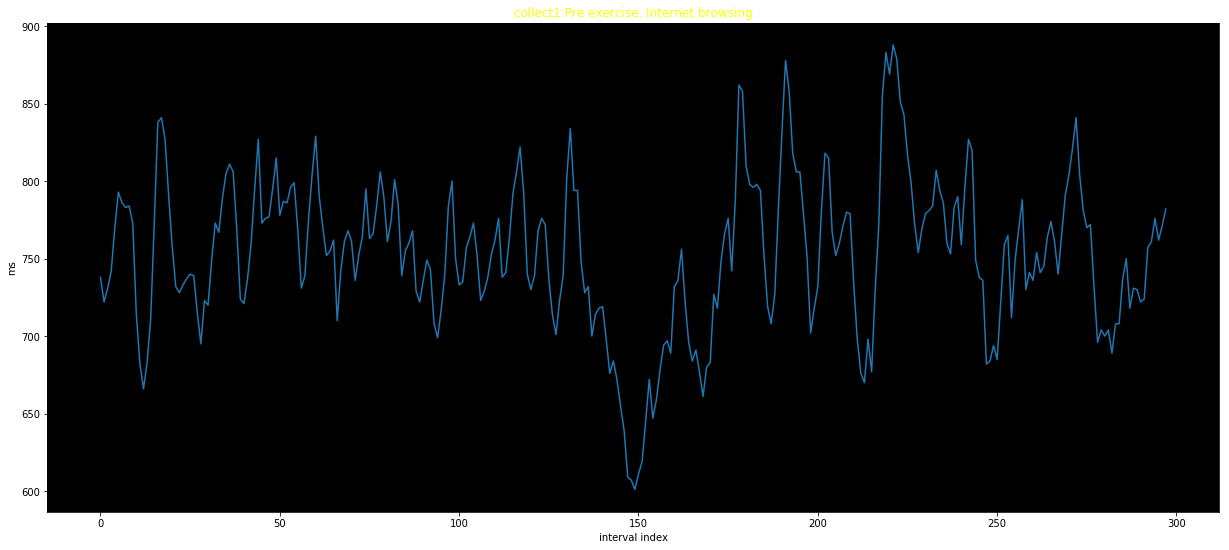

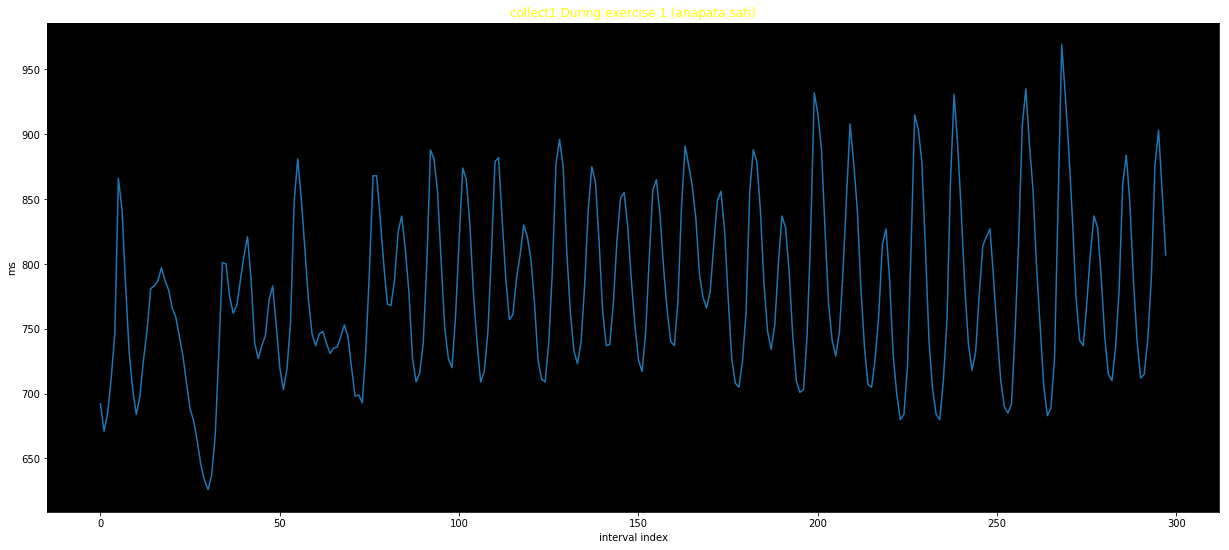

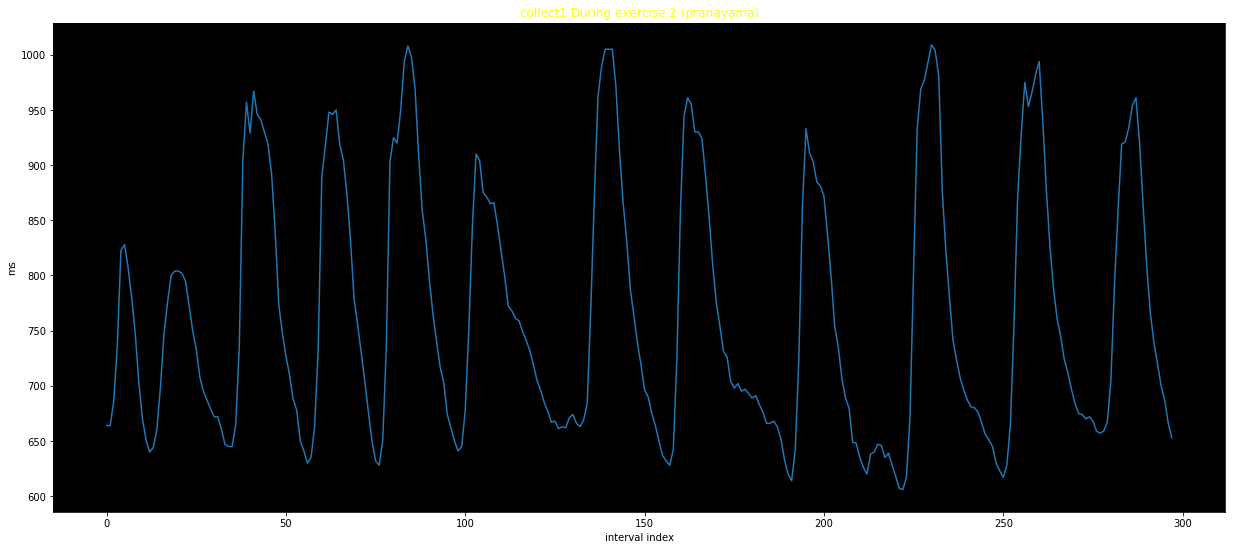

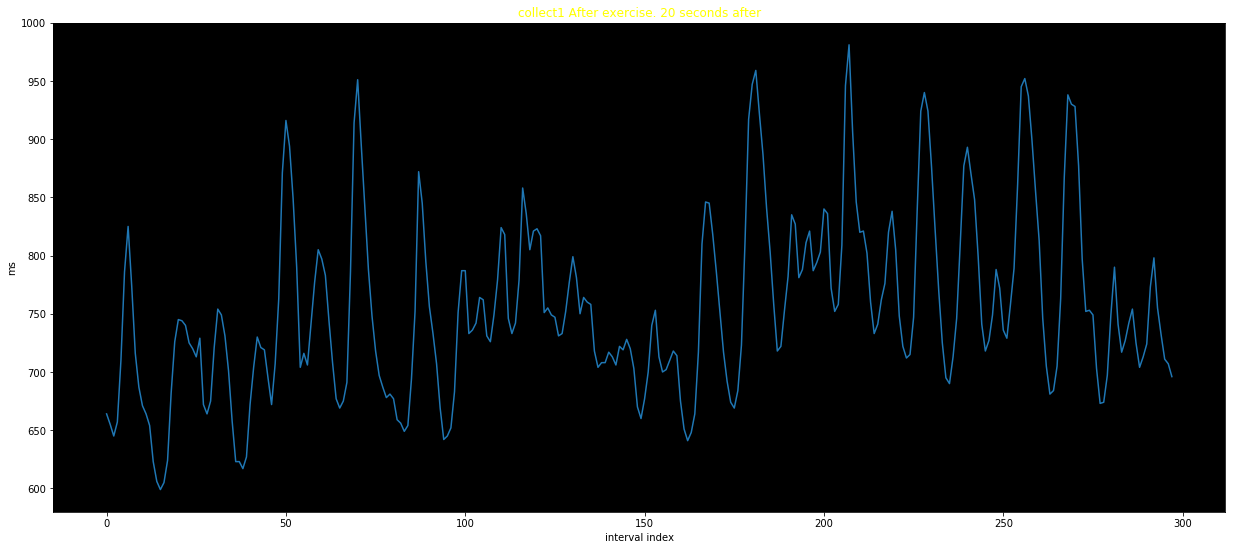

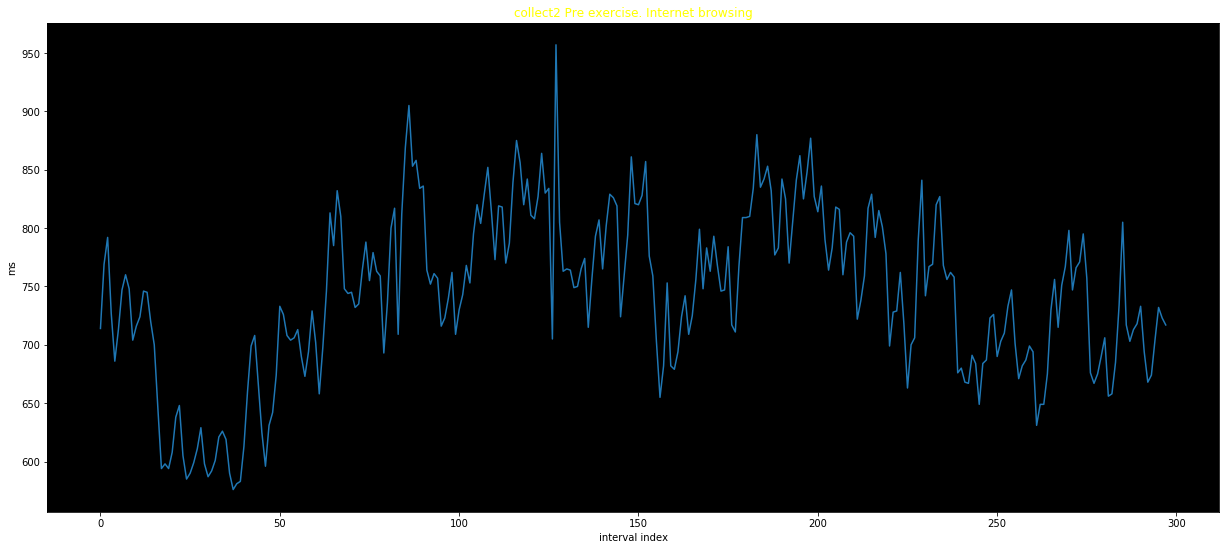

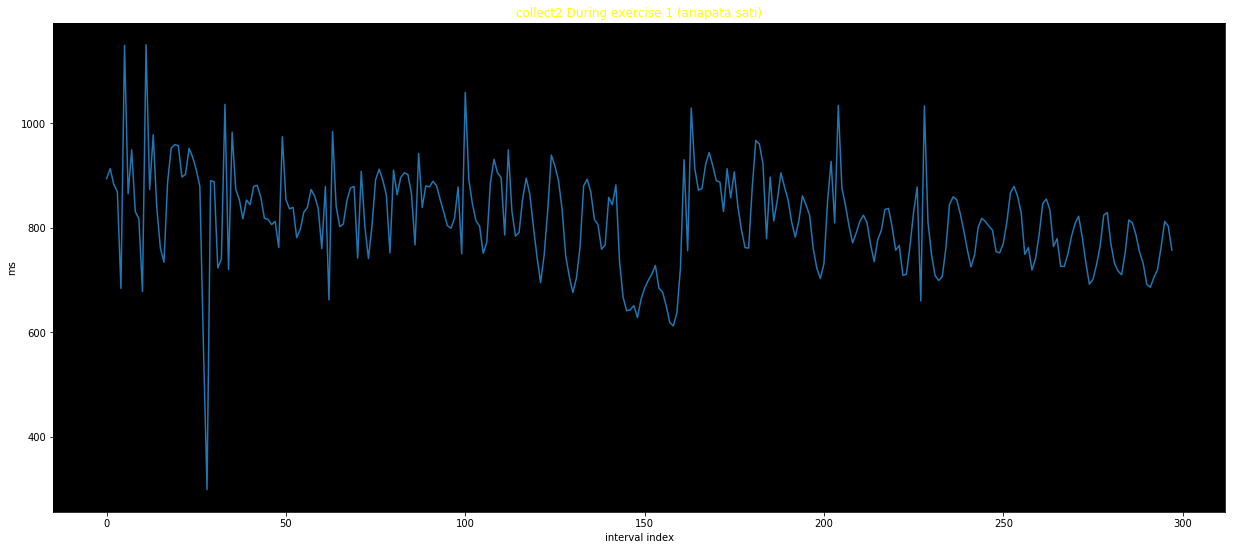

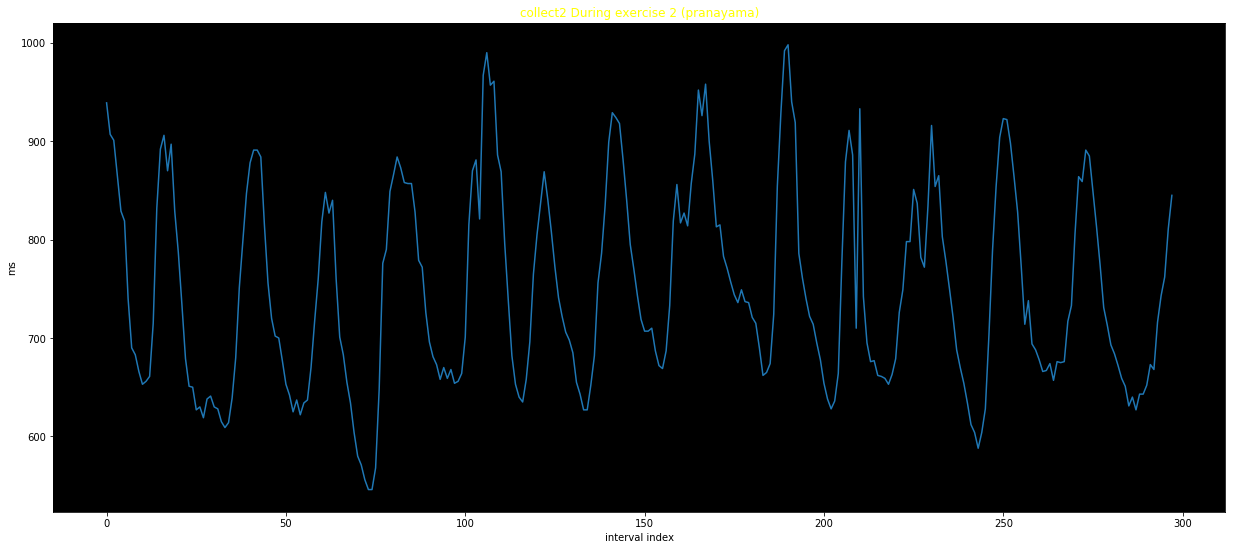

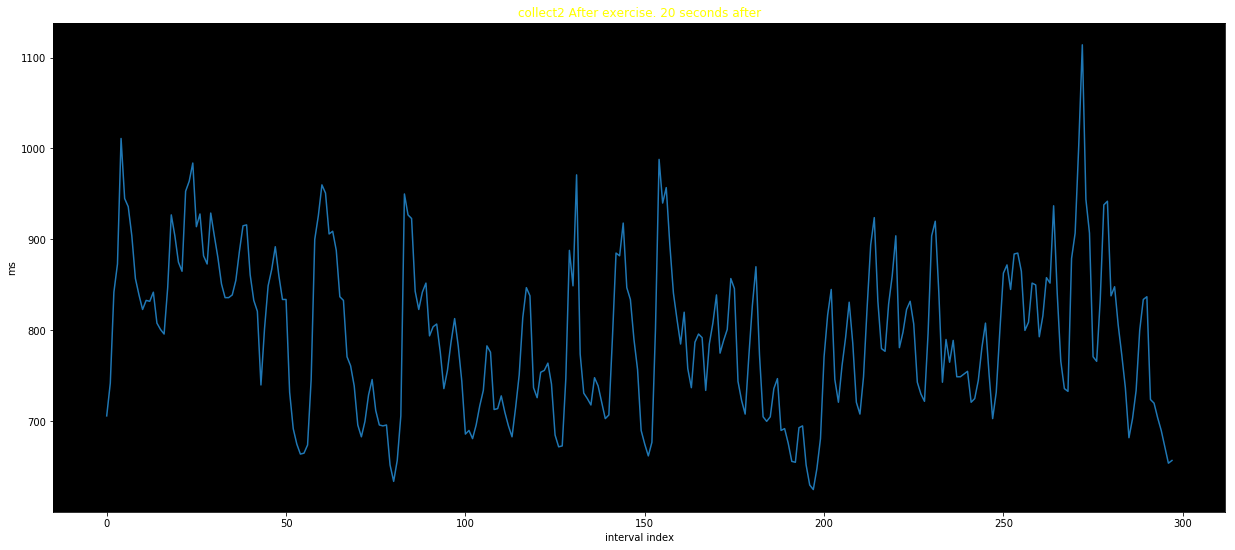

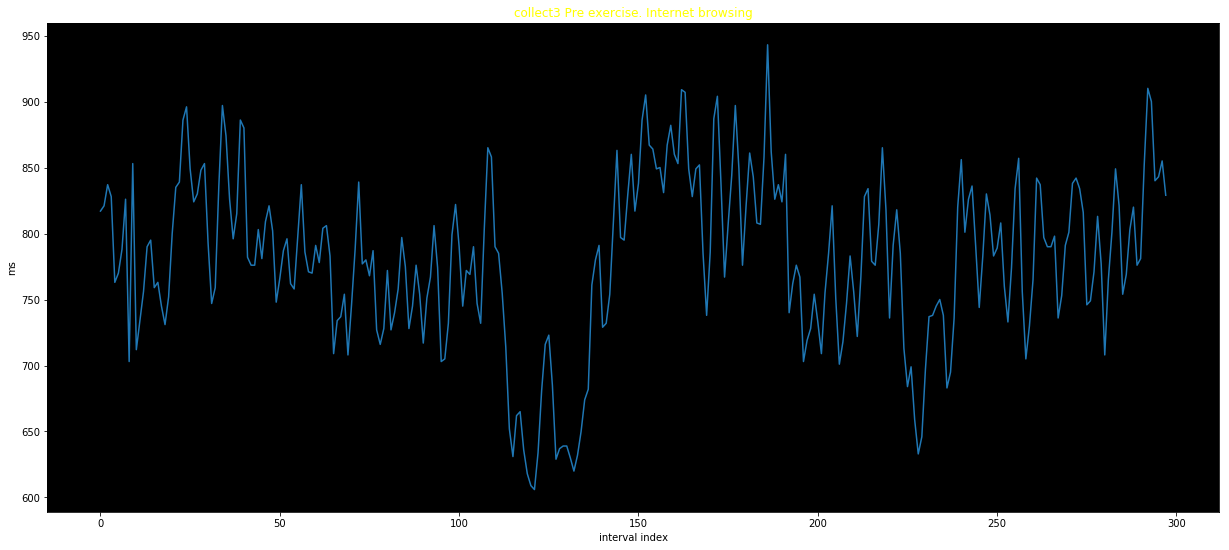

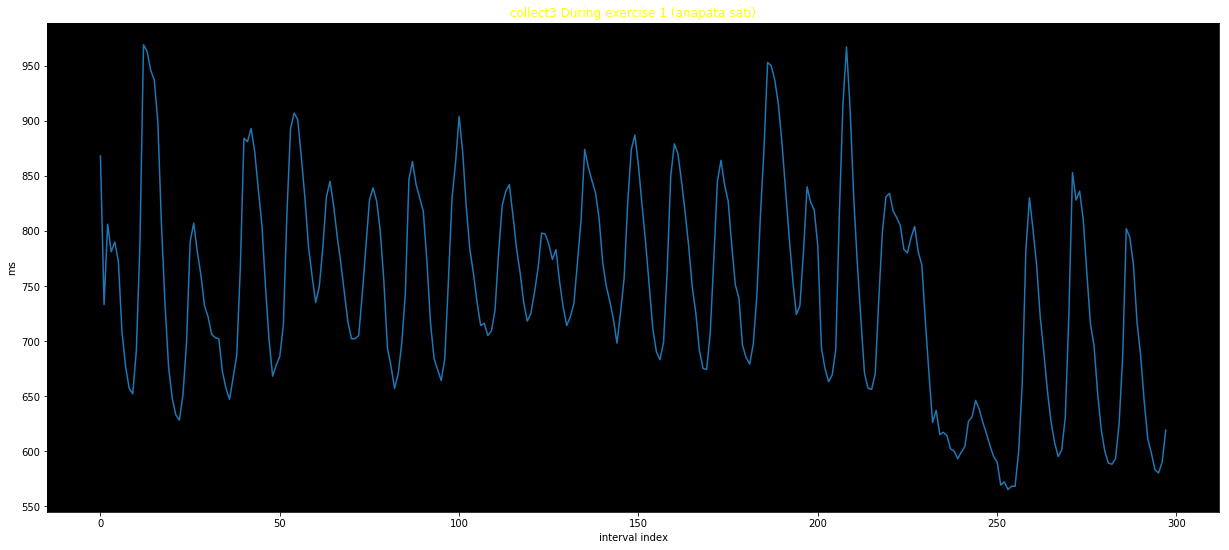

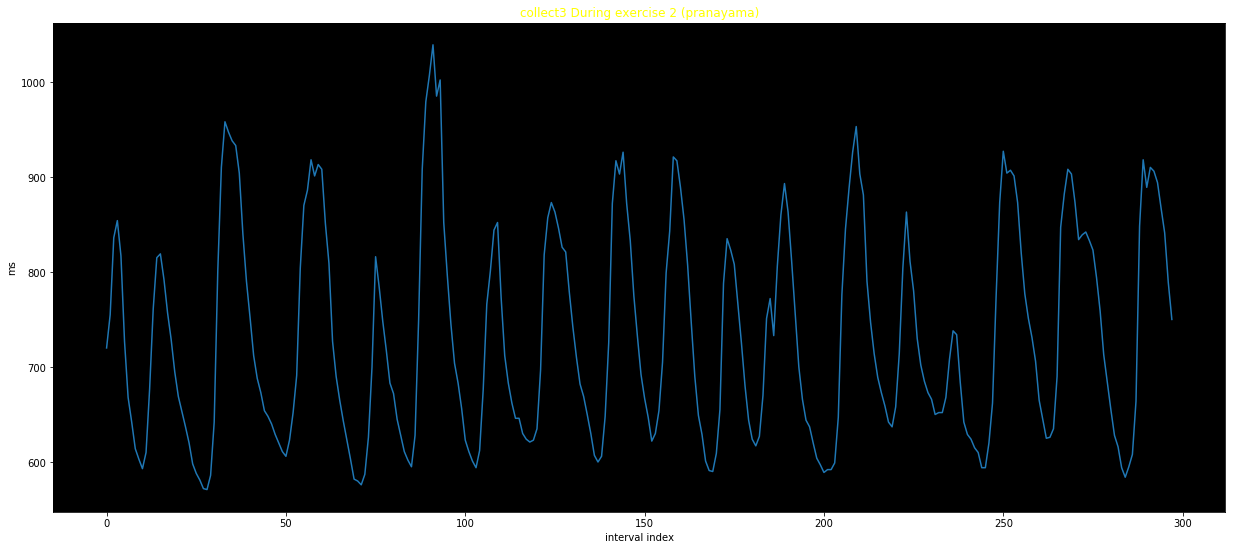

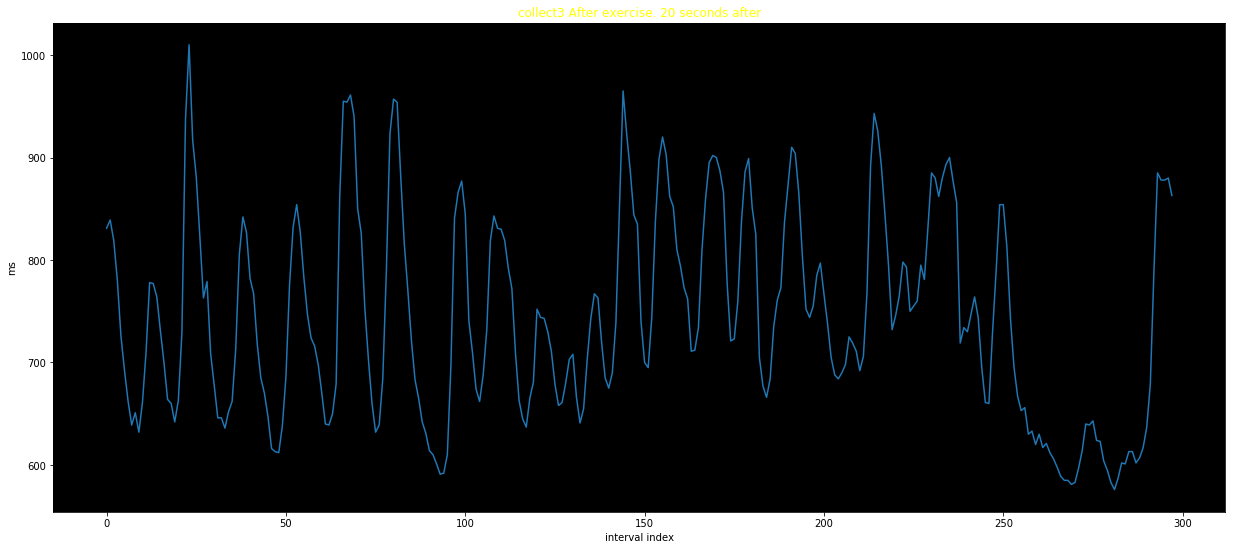

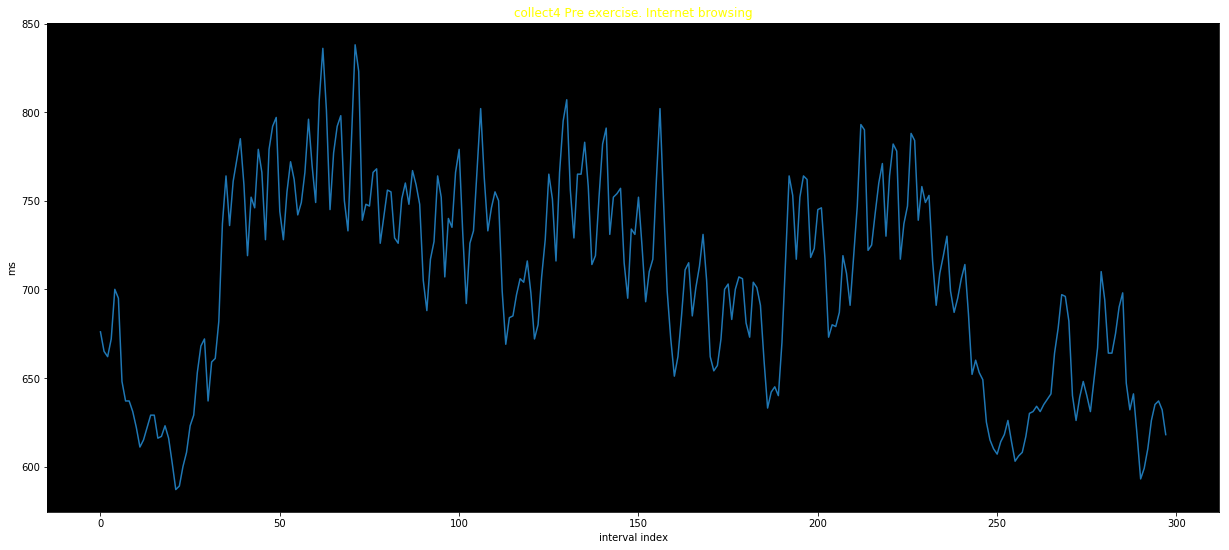

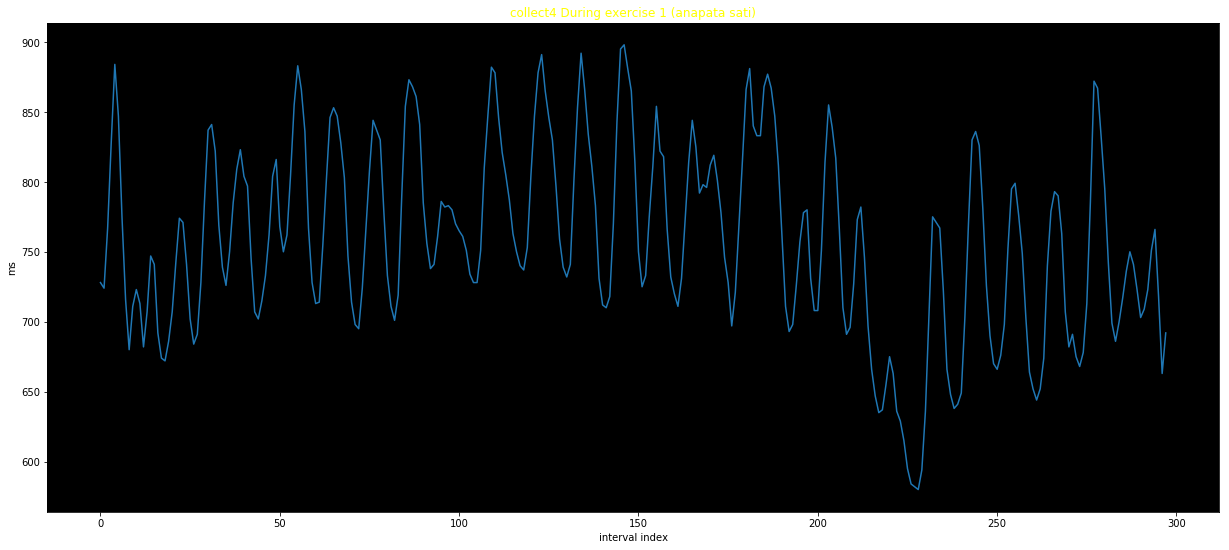

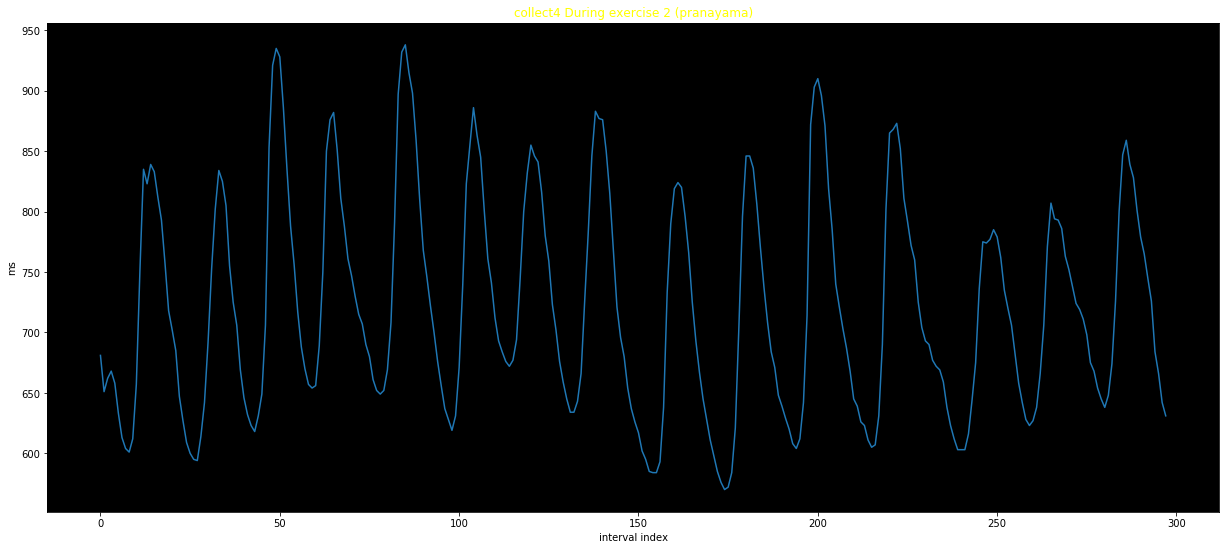

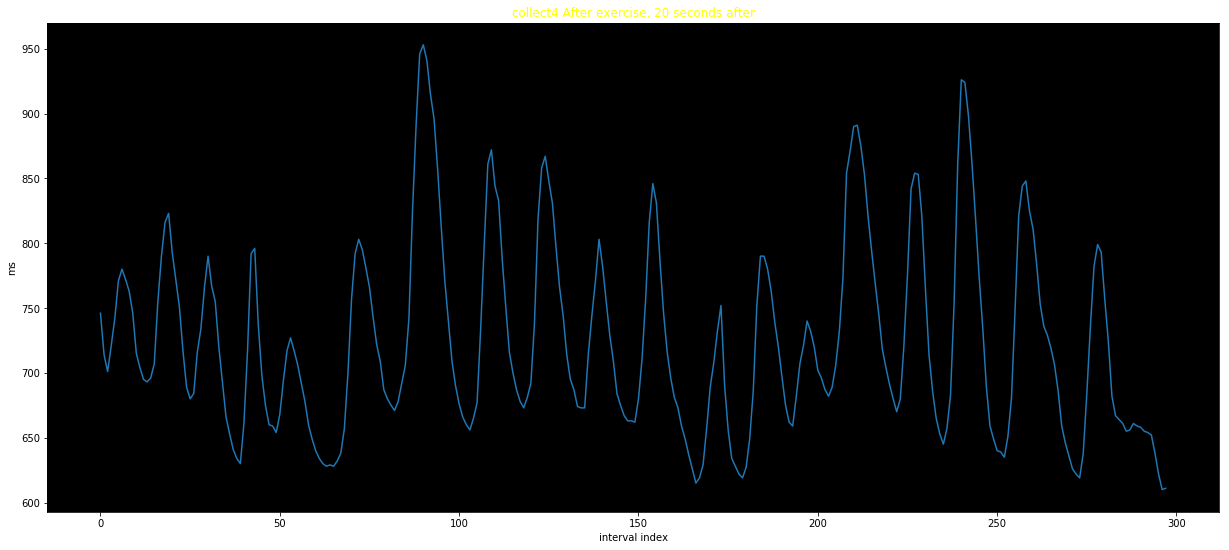

In [181]:
condition_keys = ['pre','ex1','ex2','post']
collection_keys = ["collect1","collect2","collect3","collect4"]

data_json = json.load(open('labeled_data_RRI.json','r'))
for k in collection_keys:
    for k2 in condition_keys:
        plt.figure()
        plt.plot(data_json[k][k2]['data'])
        plt.title("{} {}".format(k,data_json[k][k2]['description']))
        plt.xlabel('interval index')
        plt.ylabel('ms')

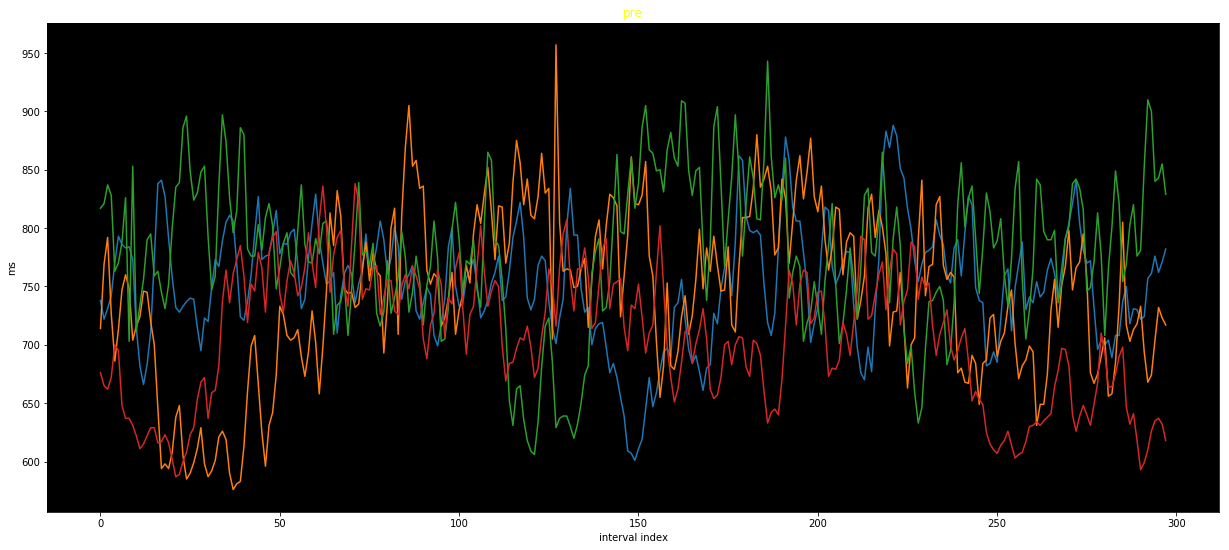

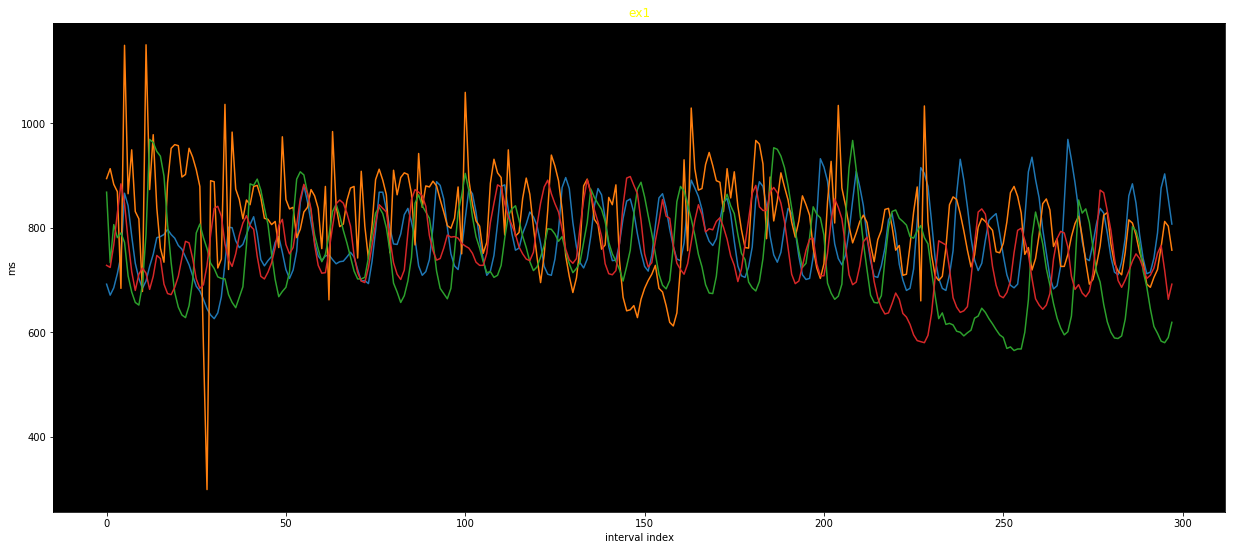

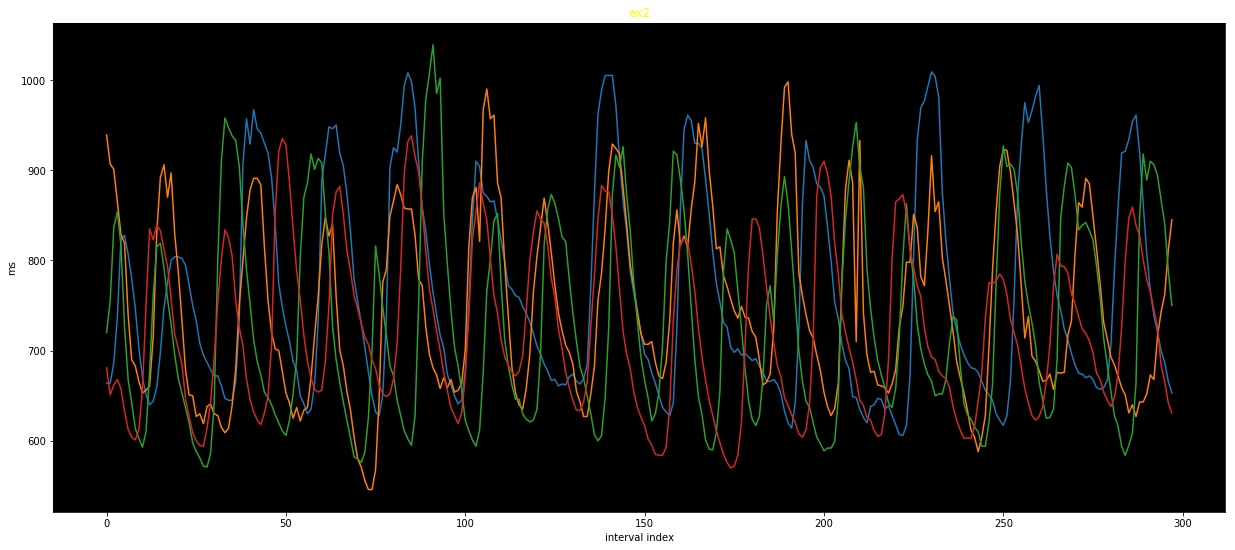

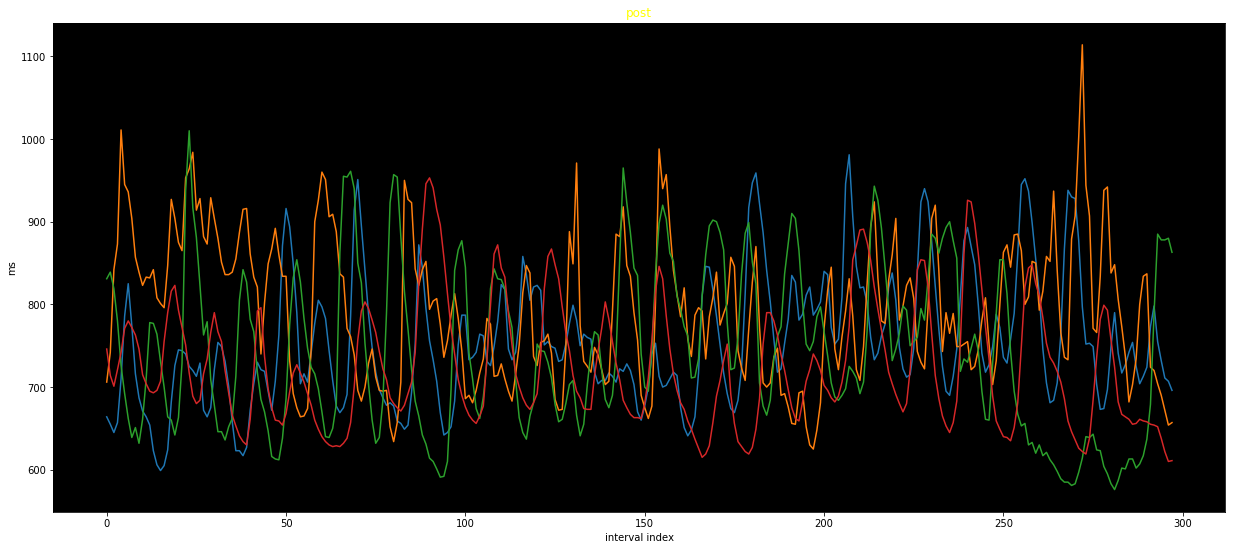

In [182]:
for k2 in condition_keys:
    plt.figure()
    plt.title(k2)
    plt.xlabel('interval index')
    plt.ylabel('ms')
    for k in collection_keys:
        plt.plot(data_json[k][k2]['data'])

# Load into Pandas Dataframes for convenient manipulation

In [183]:
data_df = {} #hold each of our collections

for c in collection_keys:
    print(c)
    #gather the data for this specific collect keyed by condition
    collect_data_dict = {k:v['data'] for k,v in data_json[c].items()}
    data_df[c] = pd.DataFrame(collect_data_dict,columns=condition_keys) #columns in logical order
    print(data_df[c].head())

collect1
   pre  ex1  ex2  post
0  738  692  664   664
1  722  671  664   655
2  731  685  686   645
3  742  712  737   657
4  770  746  823   710
collect2
   pre  ex1  ex2  post
0  714  894  939   706
1  769  913  907   742
2  792  883  901   842
3  727  869  865   873
4  686  684  829  1011
collect3
   pre  ex1  ex2  post
0  817  868  720   831
1  821  733  755   839
2  837  806  836   819
3  828  781  854   780
4  763  790  817   726
collect4
   pre  ex1  ex2  post
0  676  728  681   746
1  665  724  651   714
2  662  767  662   701
3  672  828  668   721
4  700  884  658   742


## Pandas can tell us about the data very easily
### Some basic stats we get "for free"

In [184]:
for c in collection_keys:
    print(c)
    display(data_df[c].describe())

collect1


pre         ex1          ex2        post
count  298.000000  298.000000   298.000000  298.000000
mean   752.929530  779.879195   765.691275  755.238255
std     49.621514   65.194442   115.819022   77.178792
min    601.000000  626.000000   606.000000  599.000000
25%    723.000000  732.000000   667.250000  705.000000
50%    755.000000  772.000000   731.500000  744.000000
75%    784.000000  827.750000   866.000000  798.750000
max    888.000000  969.000000  1009.000000  981.000000

collect2


pre          ex1         ex2         post
count  298.000000   298.000000  298.000000   298.000000
mean   742.812081   815.640940  749.758389   794.949664
std     71.122304    93.198578  101.612730    85.849023
min    576.000000   299.000000  546.000000   625.000000
25%    699.000000   756.250000  665.250000   728.250000
50%    747.000000   816.000000  732.000000   791.000000
75%    795.750000   878.000000  834.750000   849.750000
max    957.000000  1150.000000  998.000000  1114.000000

collect3


pre         ex1          ex2         post
count  298.000000  298.000000   298.000000   298.000000
mean   780.140940  746.959732   732.838926   744.419463
std     64.272622   91.481623   112.137456    99.759350
min    606.000000  565.000000   571.000000   576.000000
25%    744.250000  678.250000   635.500000   662.000000
50%    783.000000  749.000000   705.500000   732.000000
75%    827.500000  816.500000   825.250000   827.000000
max    943.000000  969.000000  1039.000000  1010.000000

collect4


pre         ex1         ex2        post
count  298.000000  298.000000  298.000000  298.000000
mean   705.600671  758.778523  721.704698  724.909396
std     56.402458   67.919079   90.585748   74.432998
min    587.000000  580.000000  570.000000  610.000000
25%    661.250000  711.000000  645.000000  666.250000
50%    710.500000  755.500000  706.000000  708.500000
75%    751.750000  811.000000  793.000000  771.000000
max    838.000000  898.000000  938.000000  953.000000

# Plot running windowed STD (standard deviation) of RRI

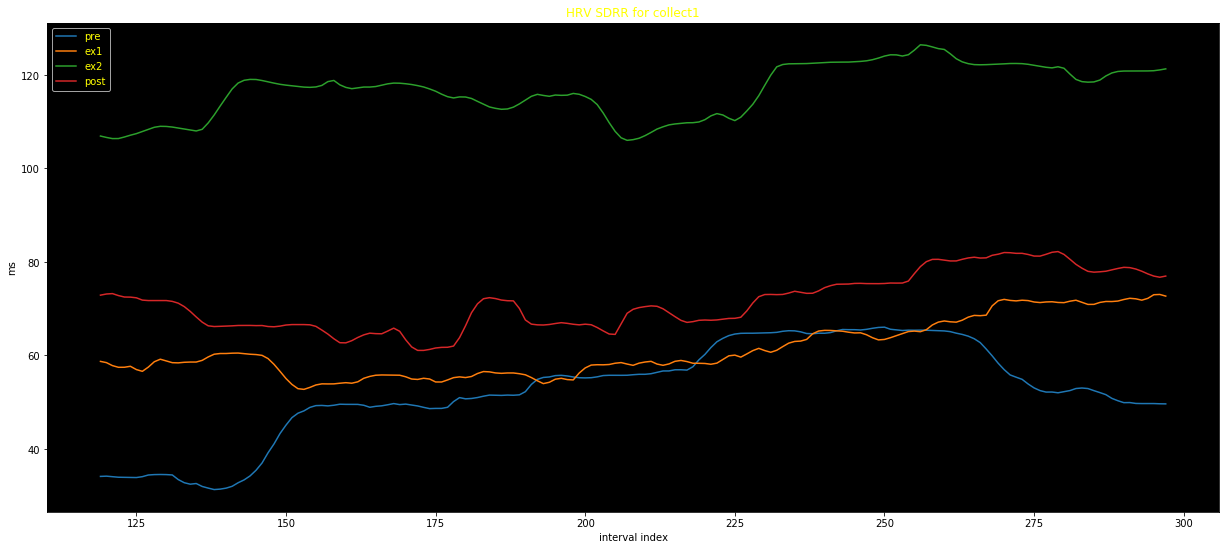

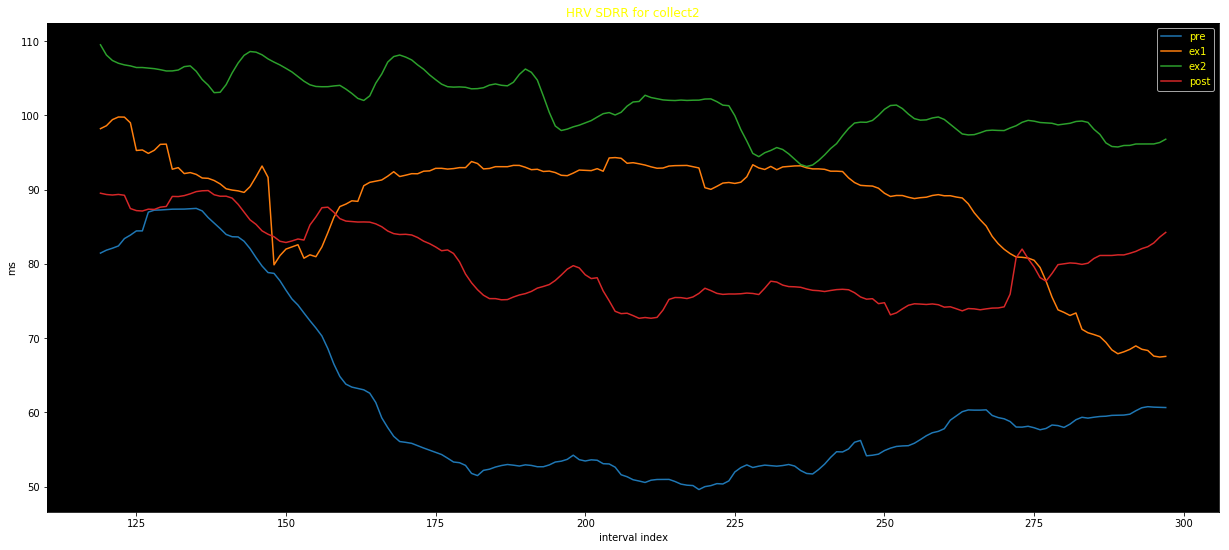

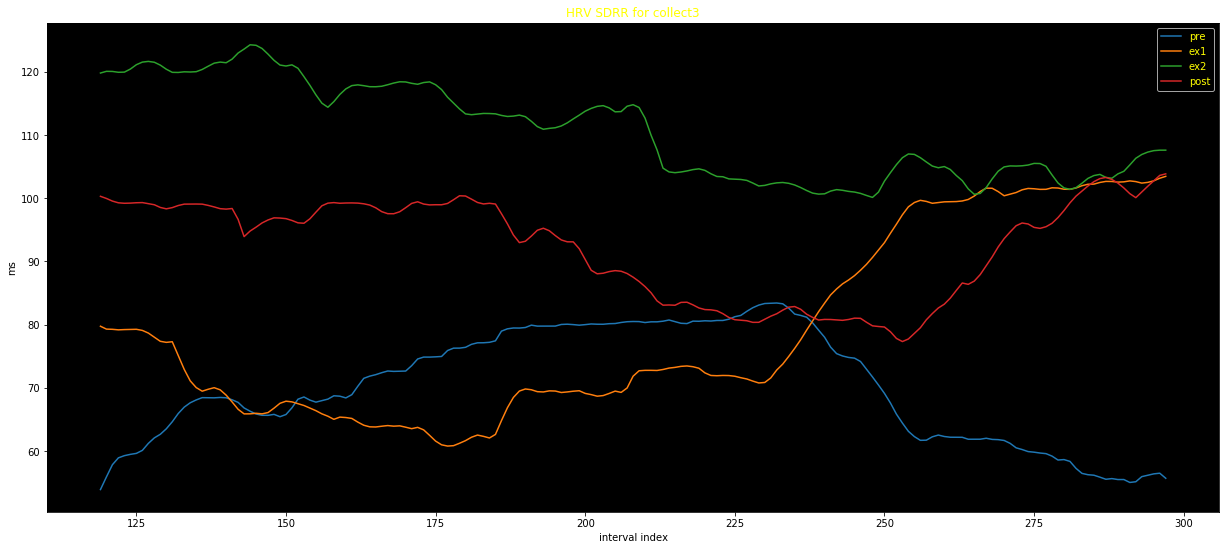

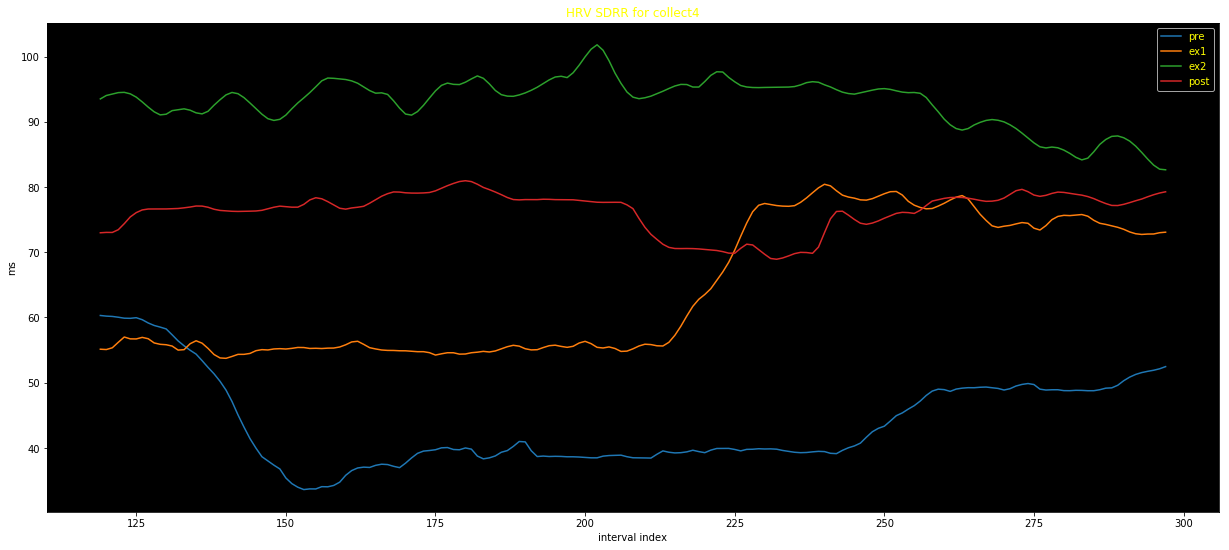

In [185]:
#mpl.rc('figure', figsize=(21, 9)) #set figure size

for c in collection_keys:
    data_df[c].rolling(window=120).std().plot()
    plt.title("HRV SDRR for {}".format(c))
    plt.xlabel('interval index')
    plt.ylabel('ms')

In [186]:
for c in collection_keys:
    print(c)
    print(data_df[c].std()) #index into data to skip "transient": data_df[c][:50]

collect1
pre      49.621514
ex1      65.194442
ex2     115.819022
post     77.178792
dtype: float64
collect2
pre      71.122304
ex1      93.198578
ex2     101.612730
post     85.849023
dtype: float64
collect3
pre      64.272622
ex1      91.481623
ex2     112.137456
post     99.759350
dtype: float64
collect4
pre     56.402458
ex1     67.919079
ex2     90.585748
post    74.432998
dtype: float64


# Plot running windowed RMSSD (root mean square of successive differences)

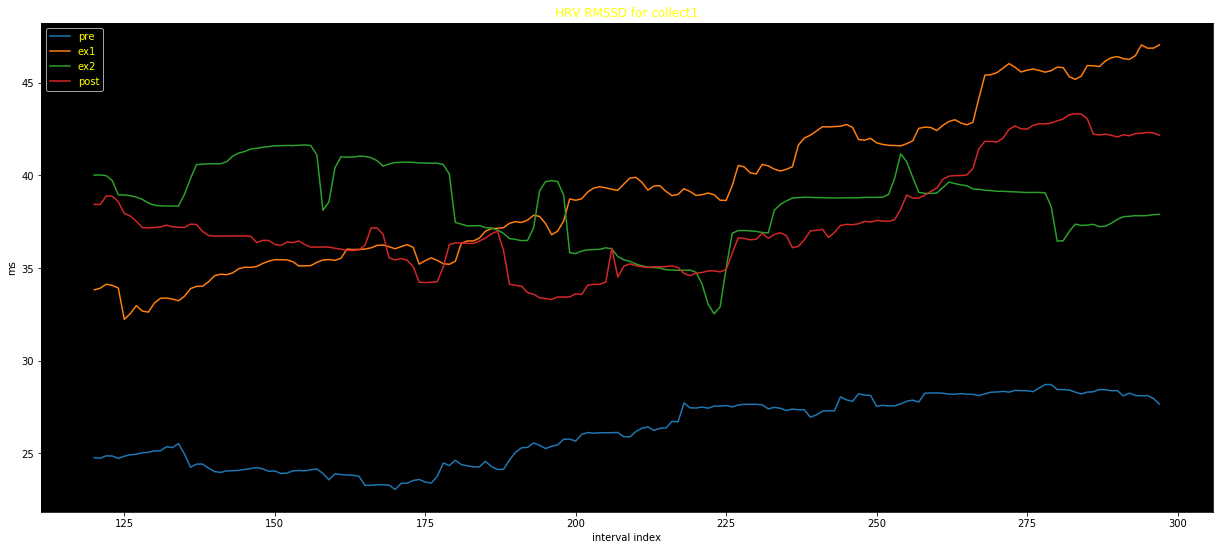

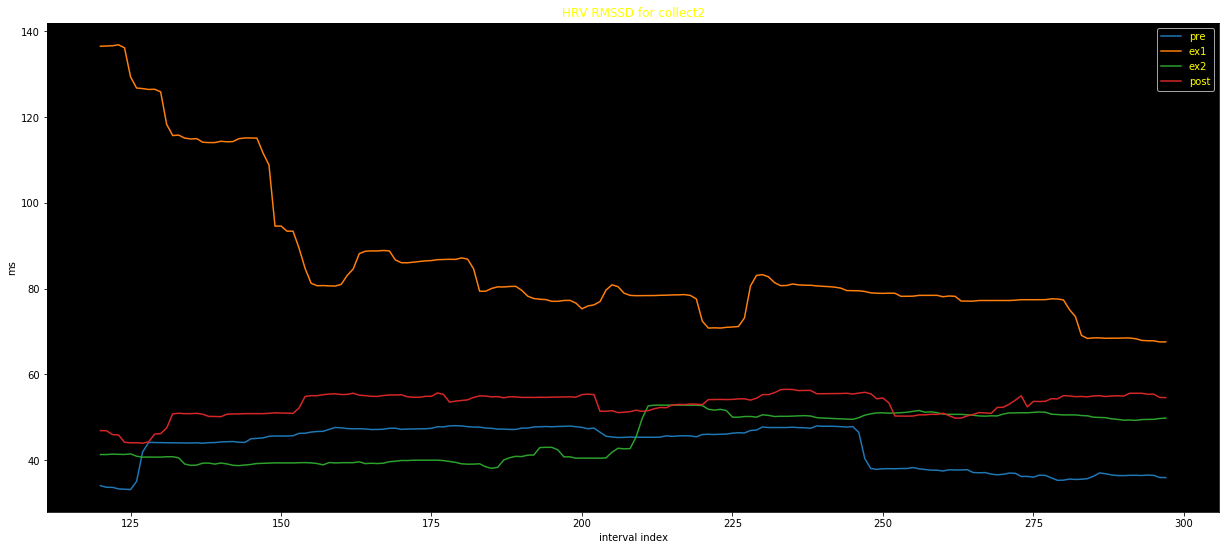

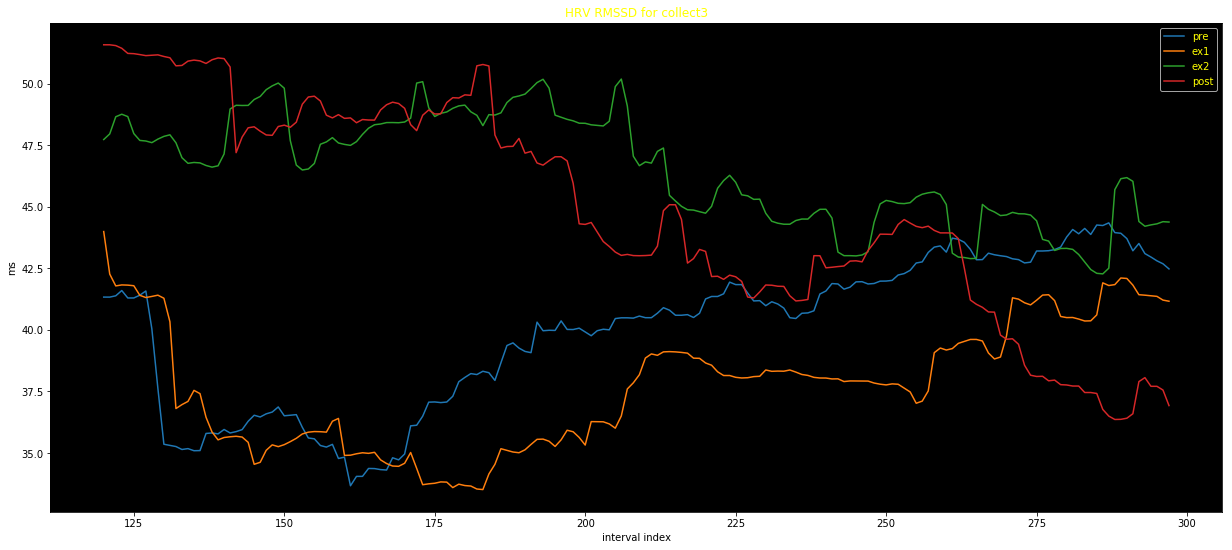

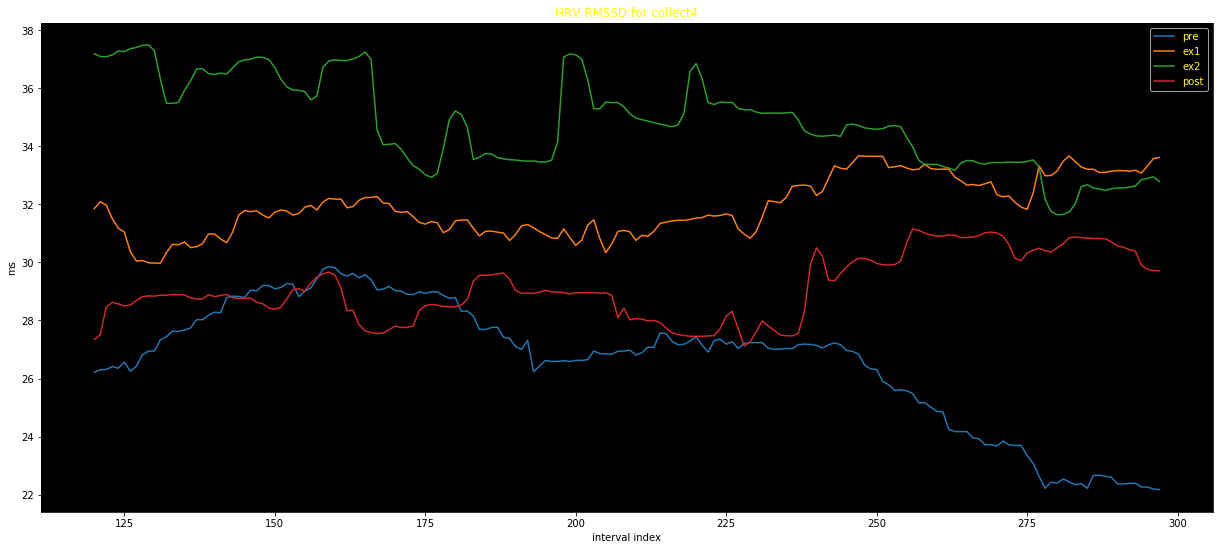

In [187]:
def root_mean_square(vals):
    return np.sqrt(np.mean(np.square(vals)))

for c in collection_keys:
    diff_df = data_df[c] - data_df[c].shift(1)
    diff_df.rolling(window=120).apply(func=root_mean_square).plot()
    plt.title("HRV RMSSD for {}".format(c))
    plt.xlabel('interval index')
    plt.ylabel('ms')

In [188]:
for c in collection_keys:
    print(c)
    diff_df = data_df[c] - data_df[c].shift(1)
    print(diff_df.apply(func=root_mean_square)) #may want to skip transient here too (see above)

collect1
pre     25.744013
ex1     40.136509
ex2     38.733963
post    37.991493
dtype: float64
collect2
pre      39.887088
ex1     101.931894
ex2      43.596250
post     53.057970
dtype: float64
collect3
pre     41.284999
ex1     41.010100
ex2     46.506290
post    44.617944
dtype: float64
collect4
pre     25.086383
ex1     32.700251
ex2     34.088813
post    28.465763
dtype: float64


# Plot Poincare Return Map of RRI

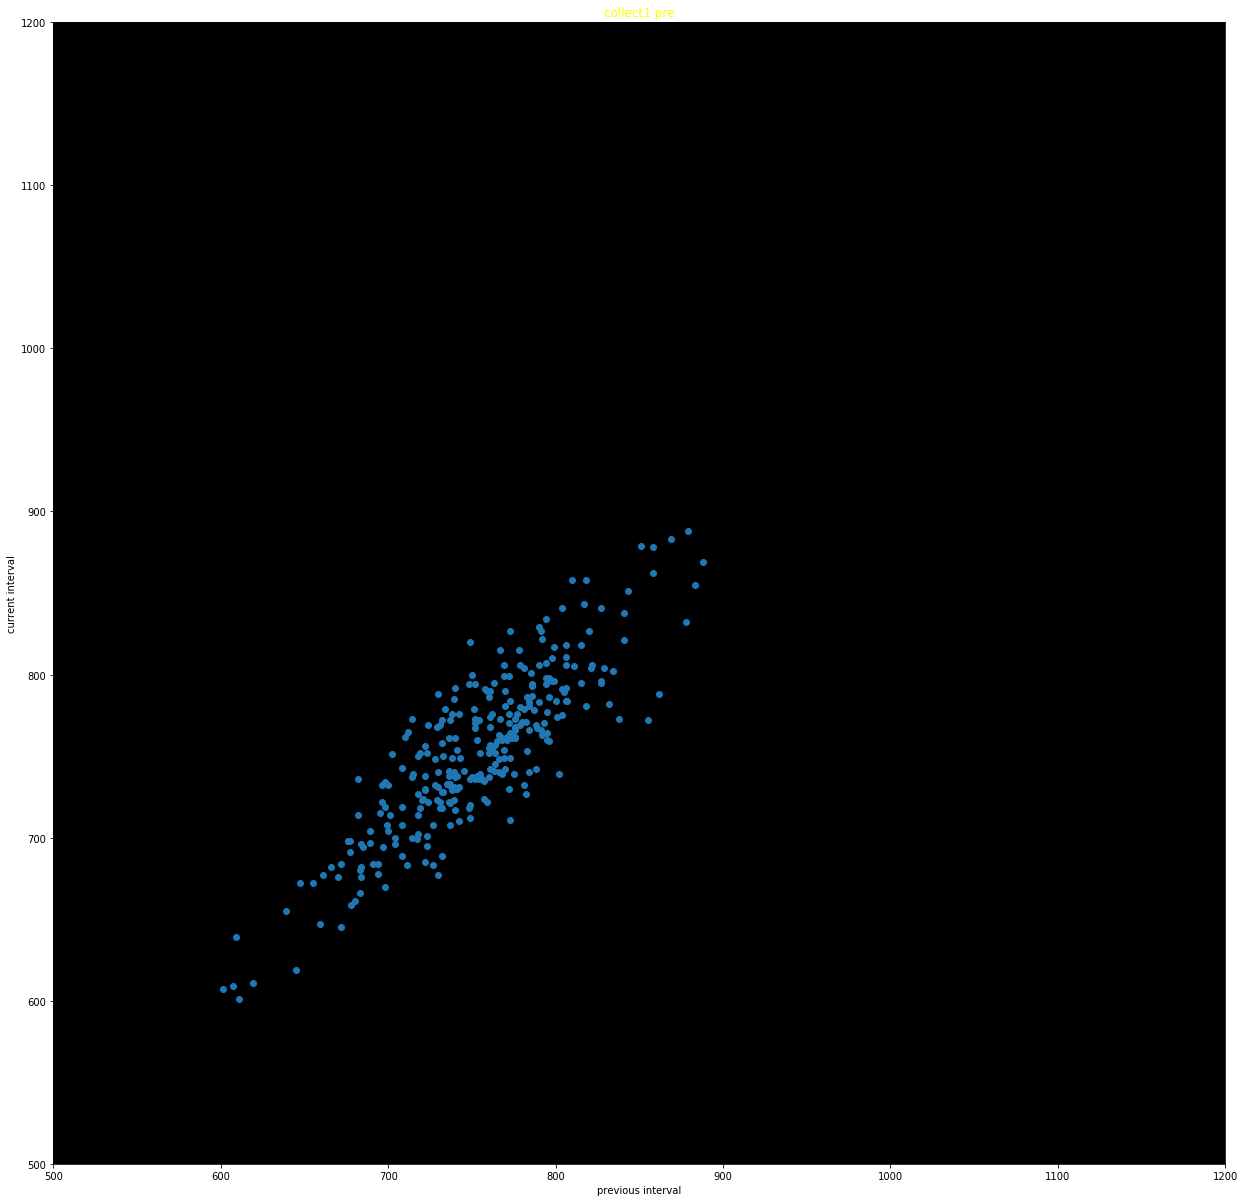

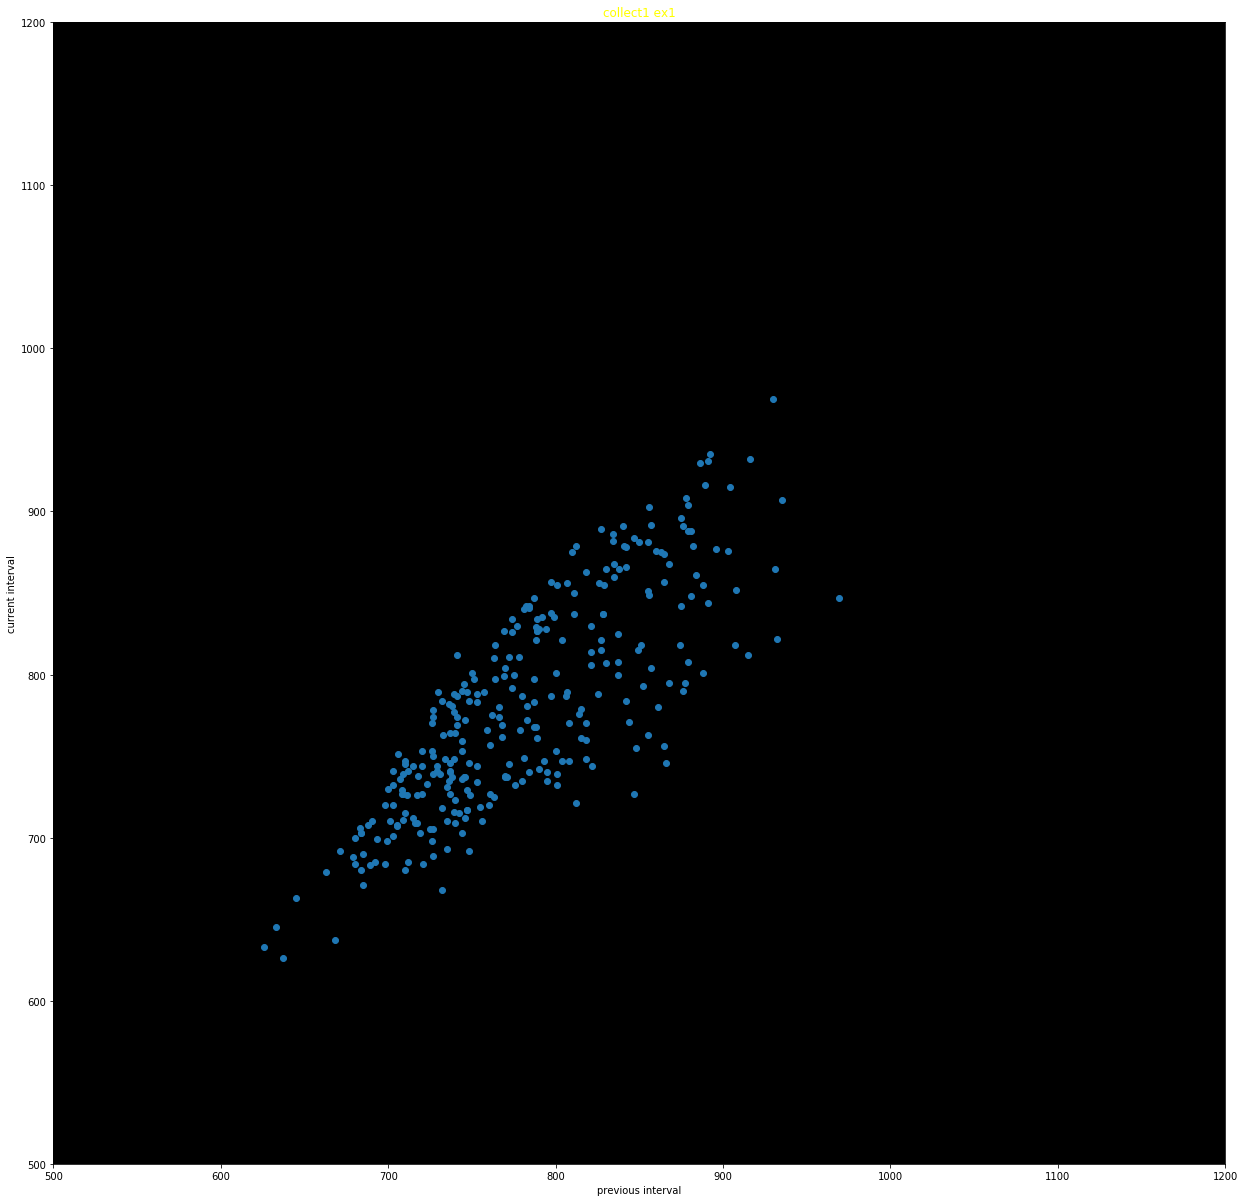

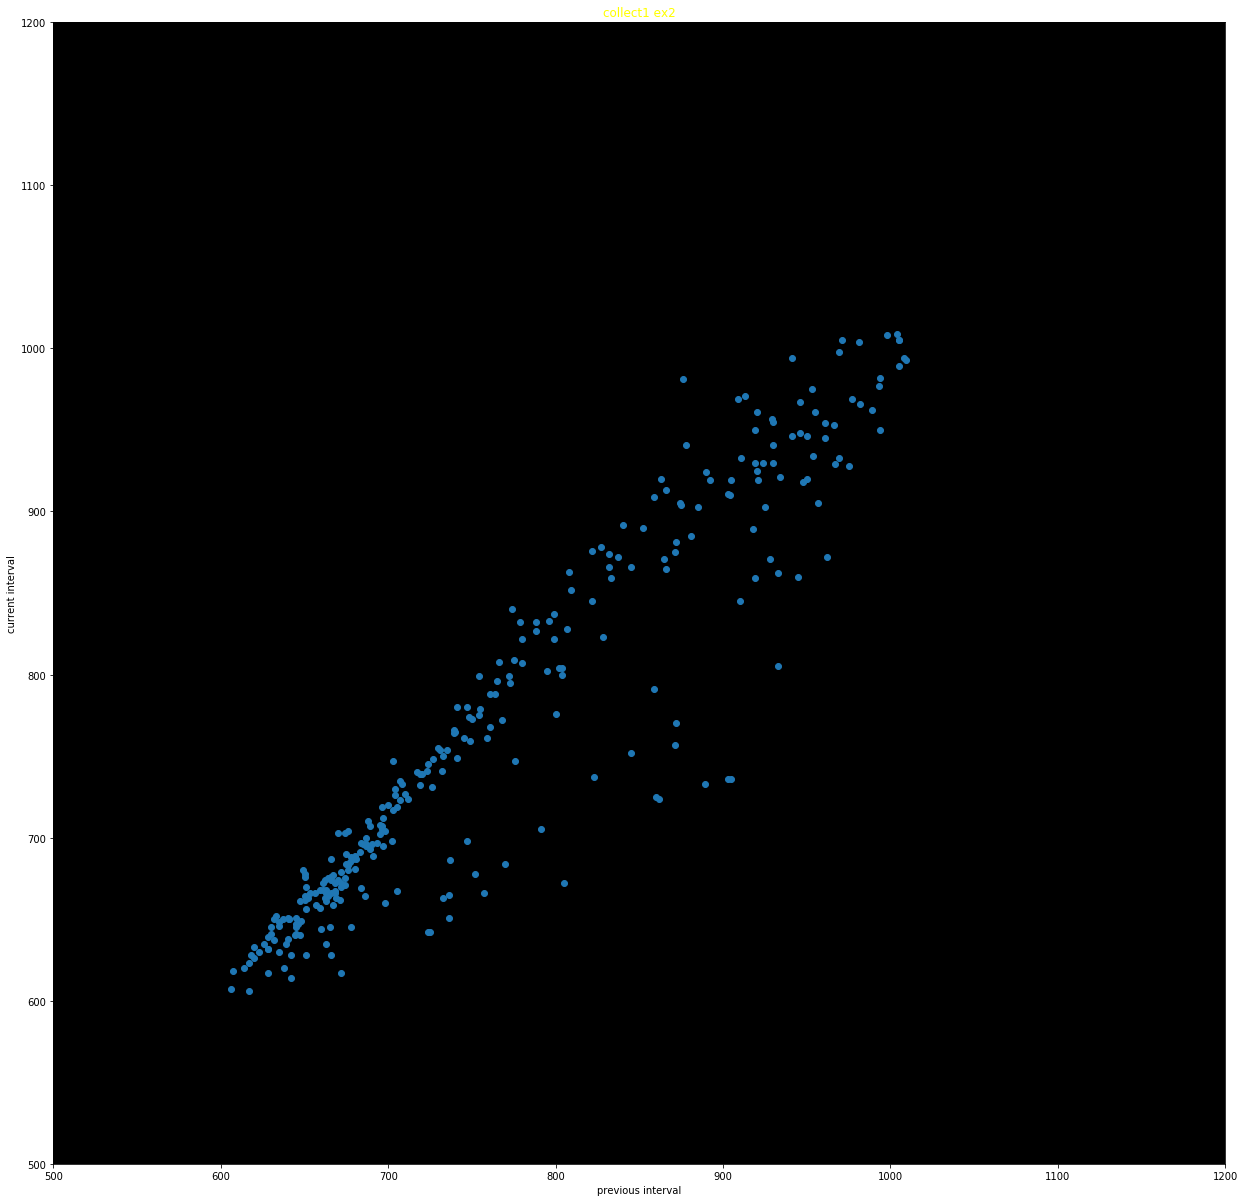

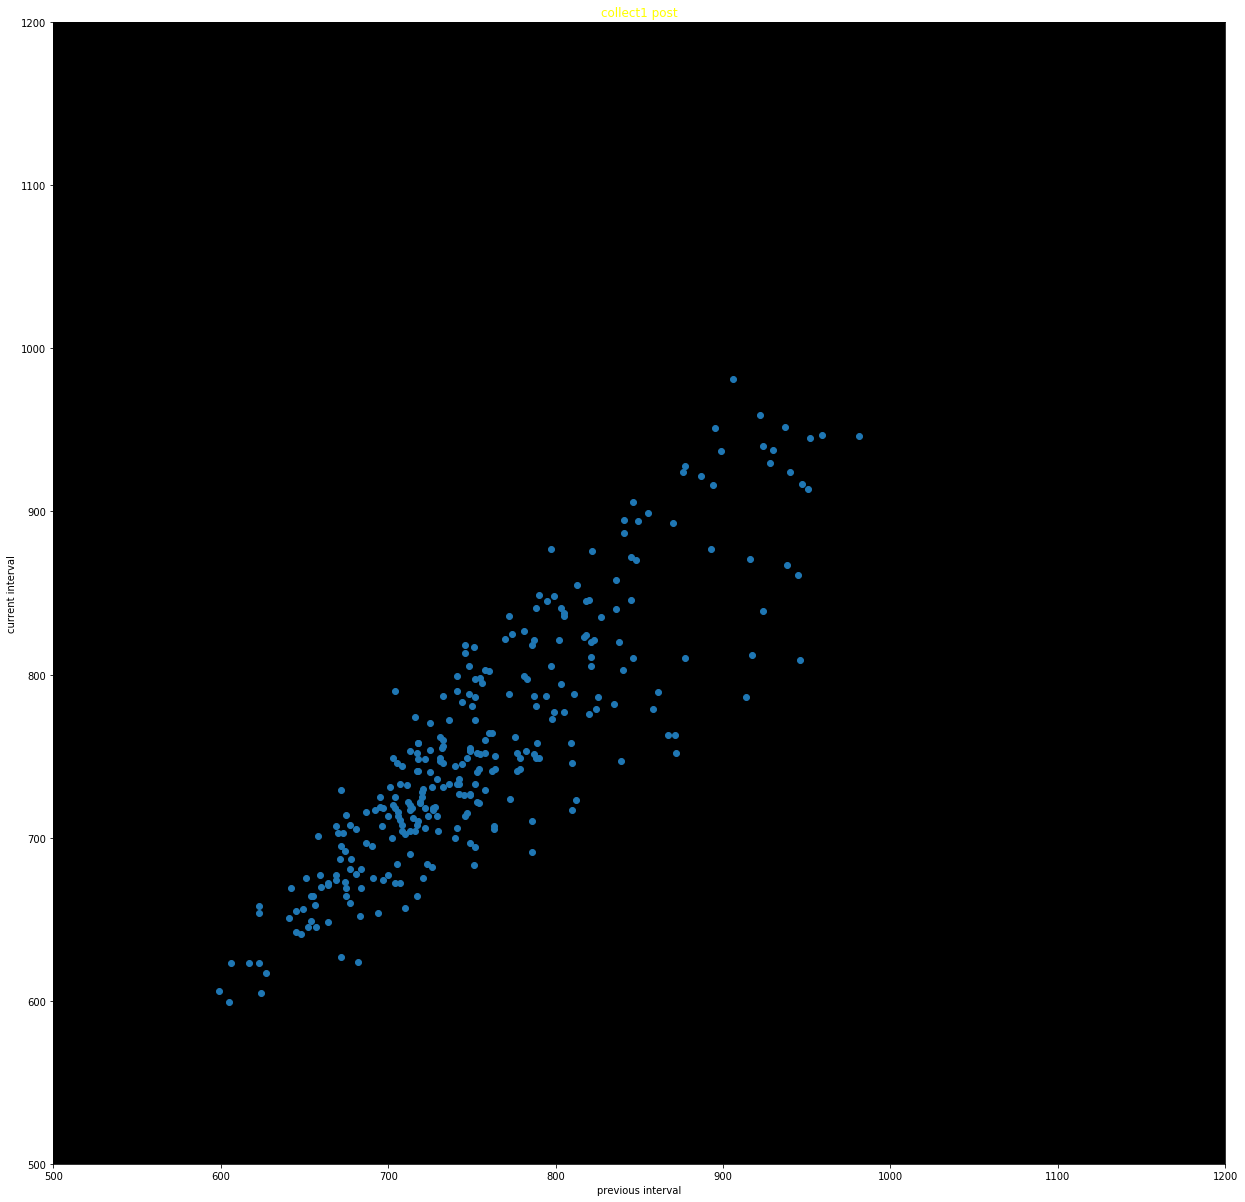

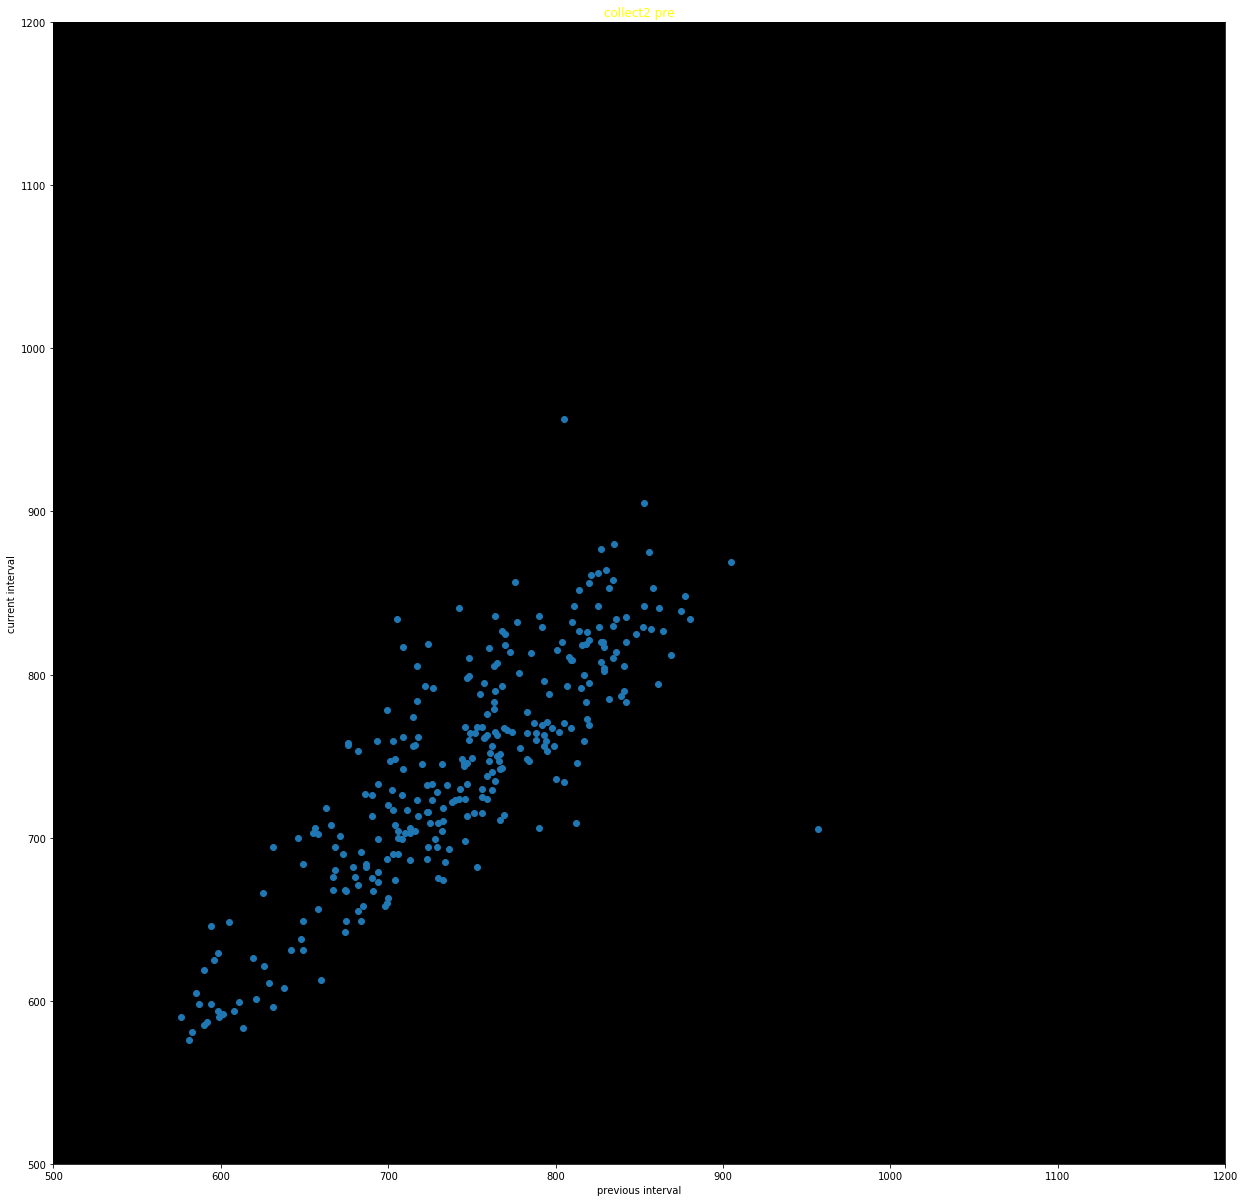

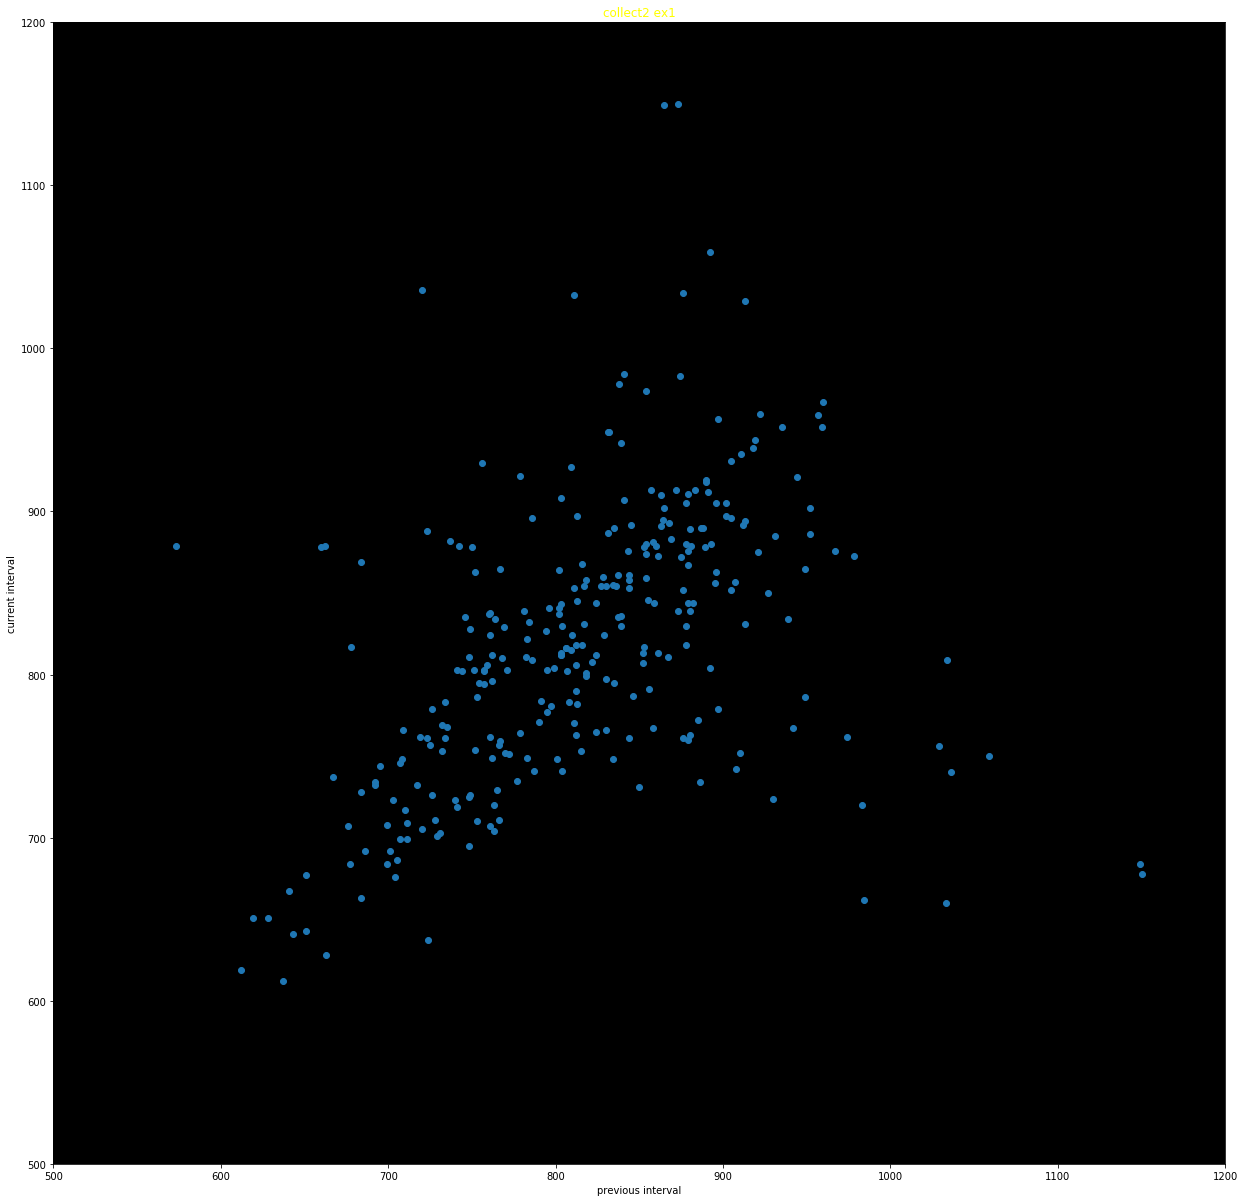

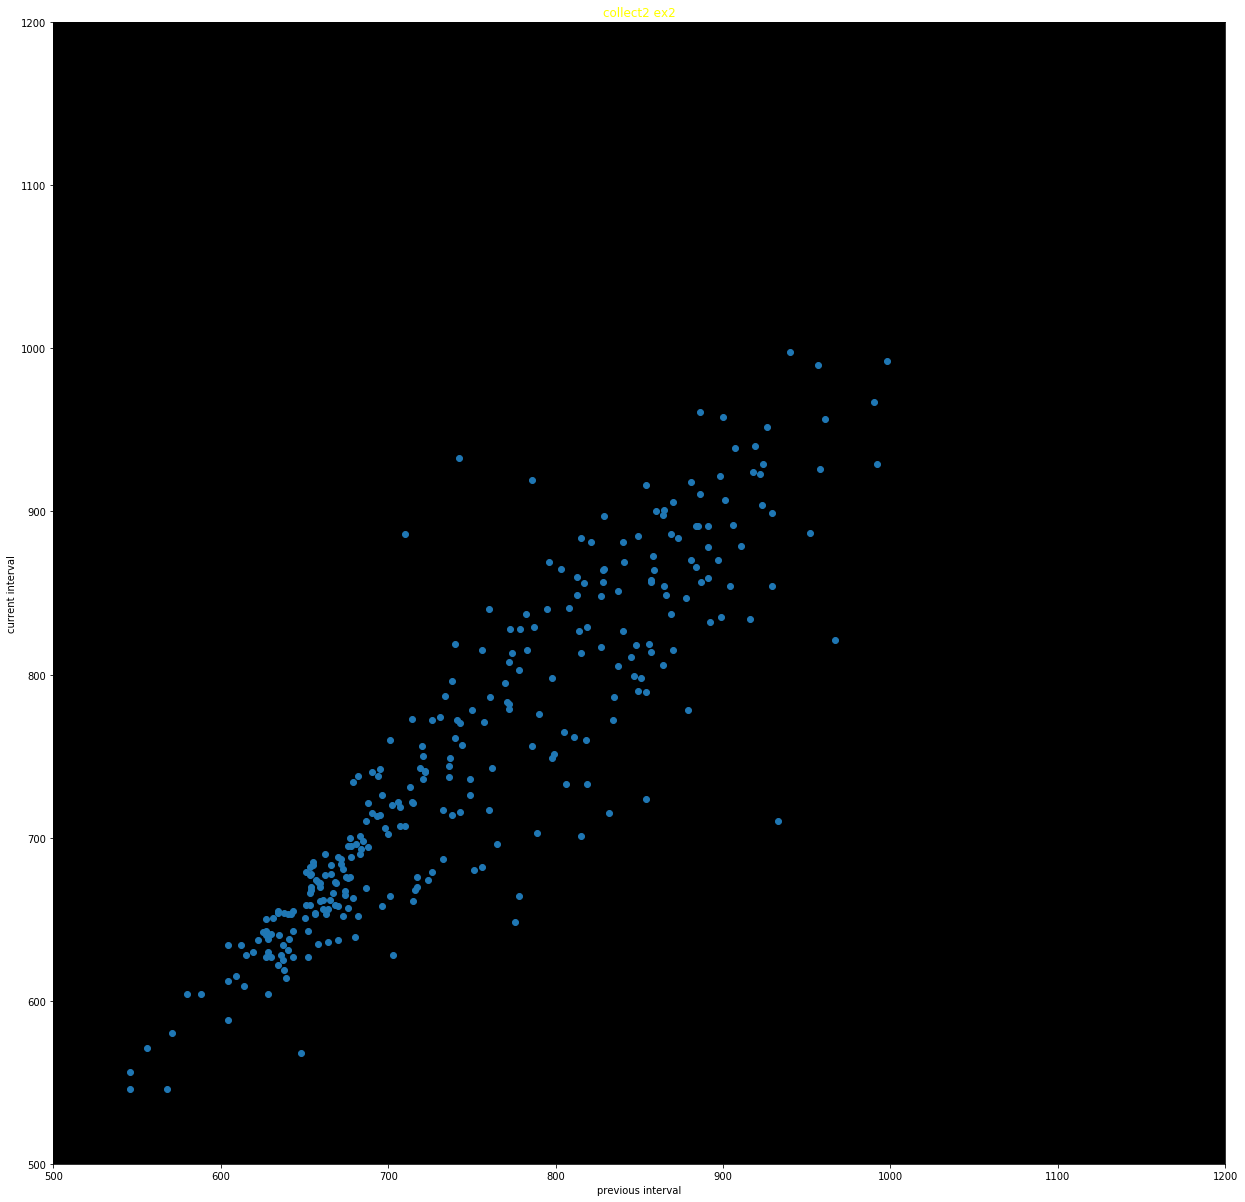

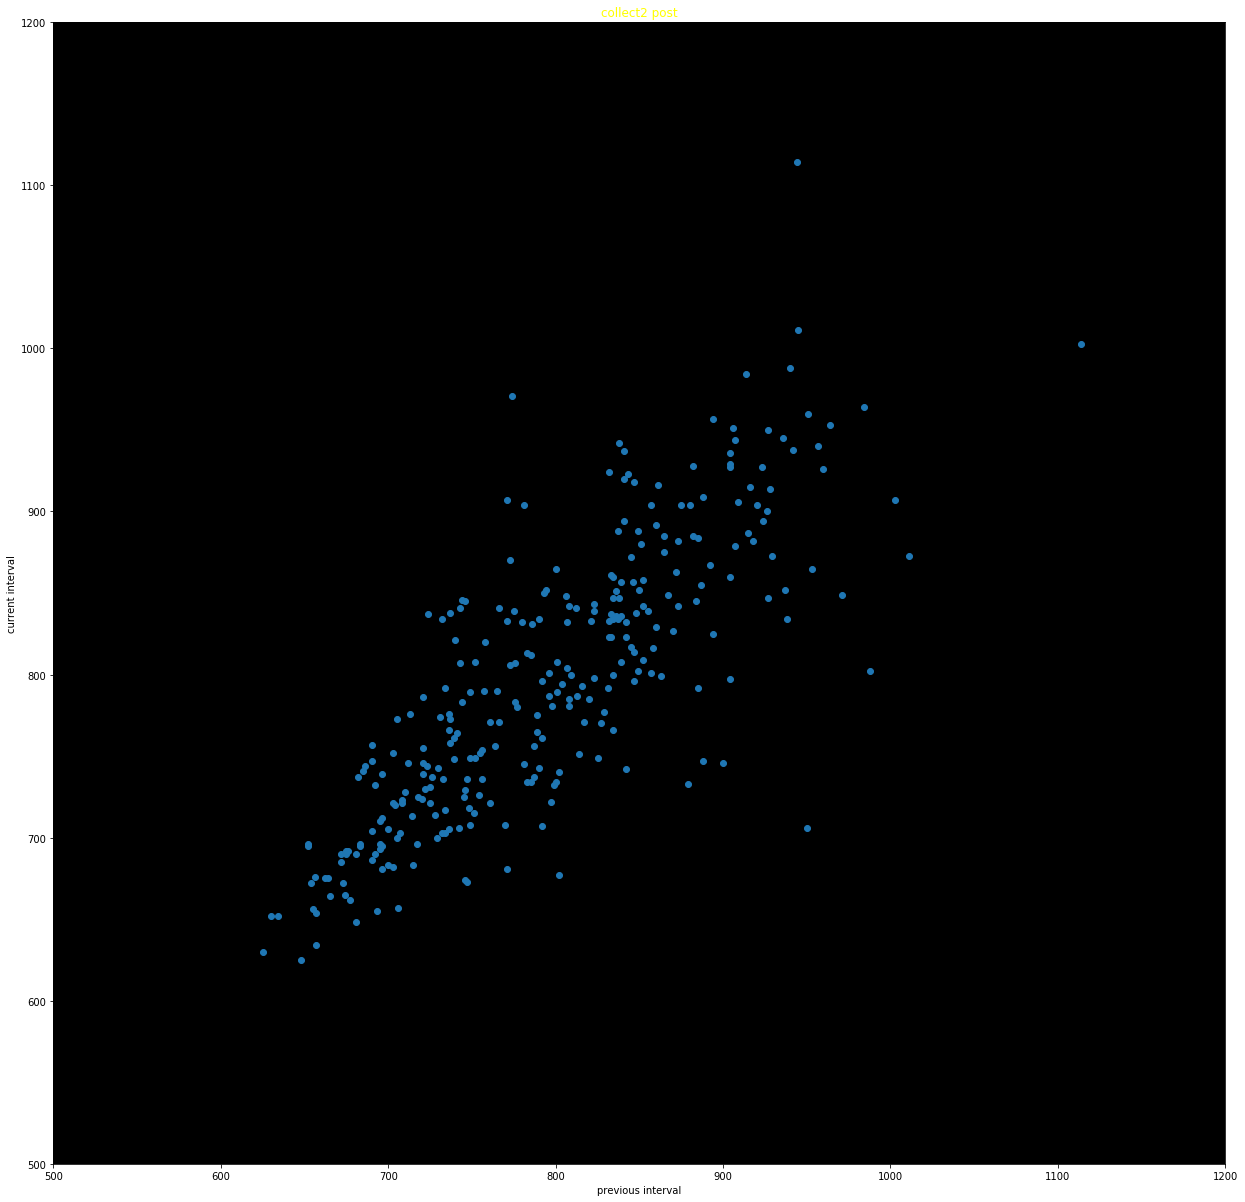

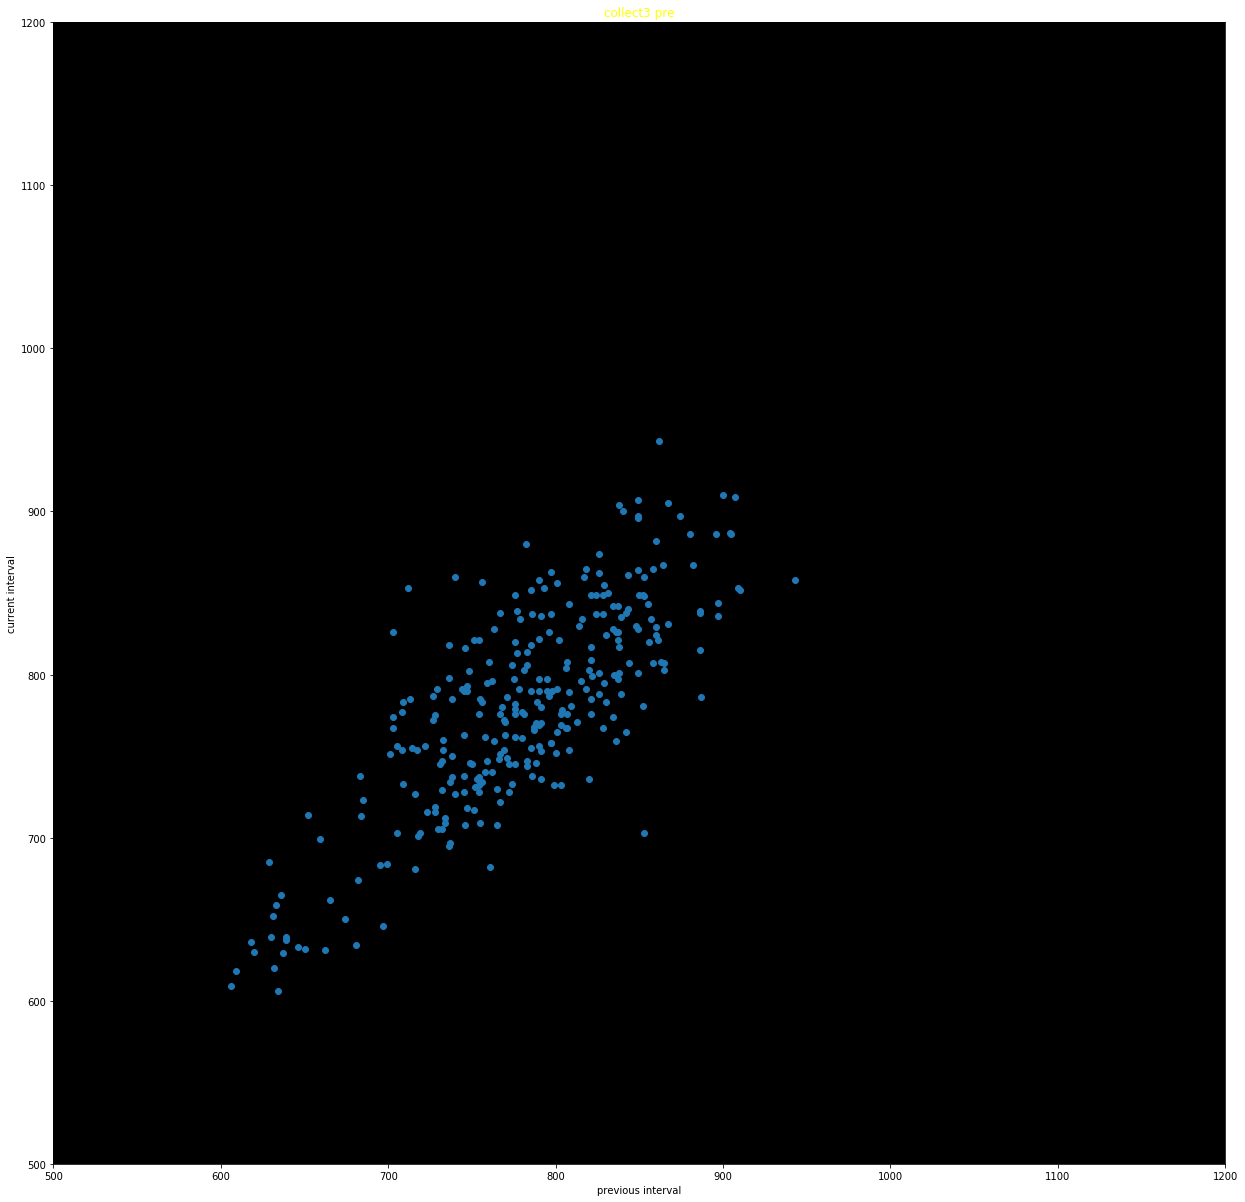

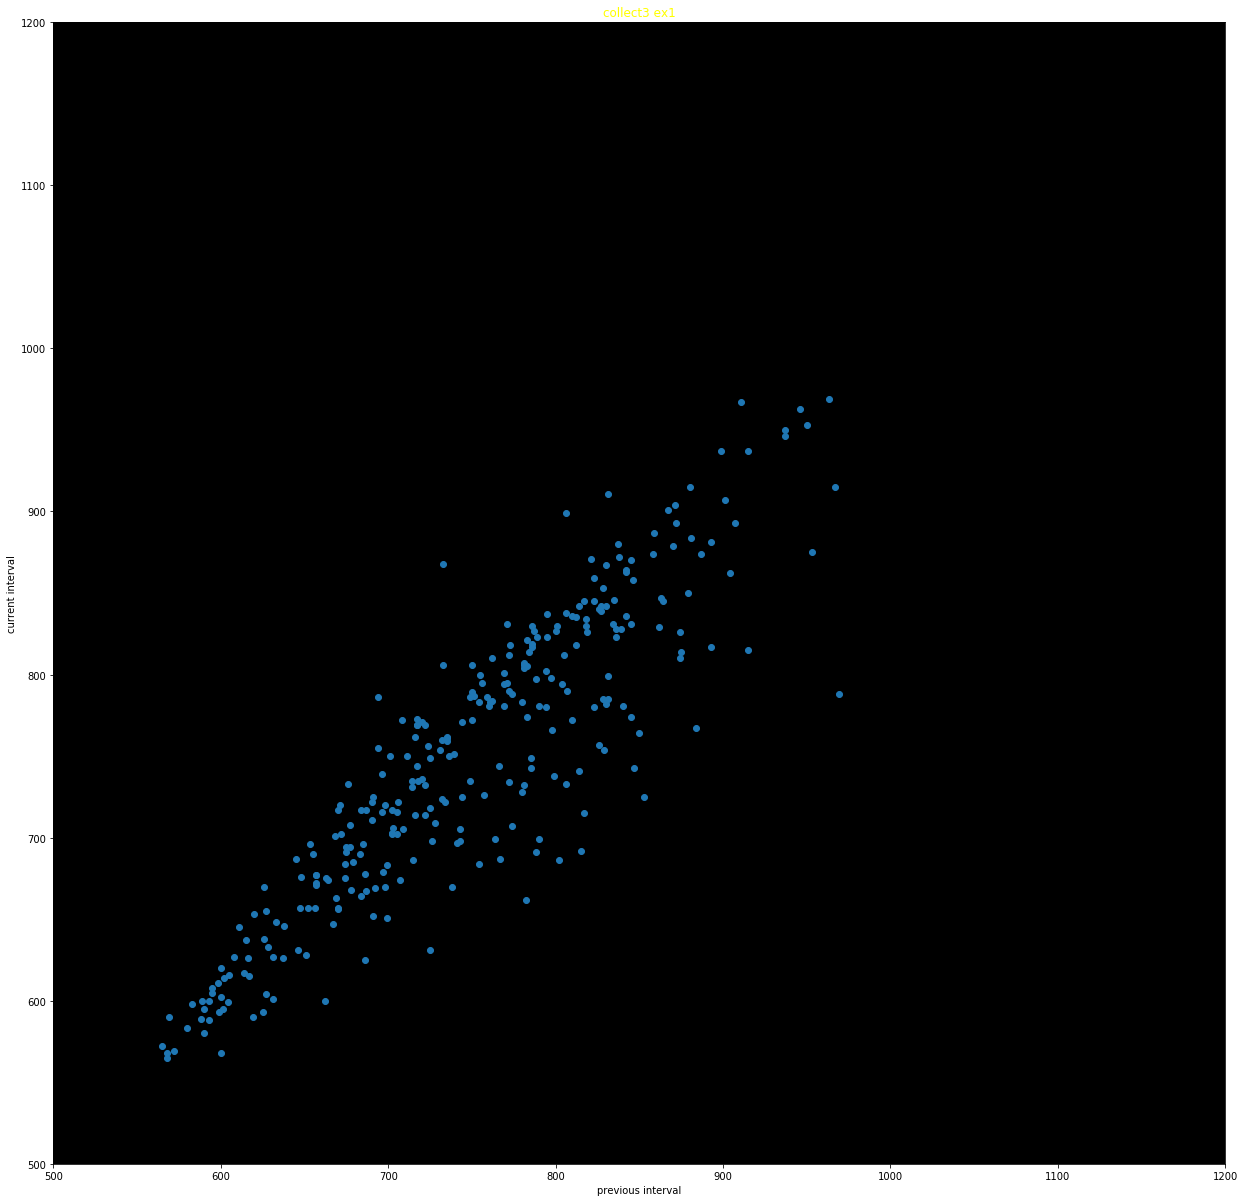

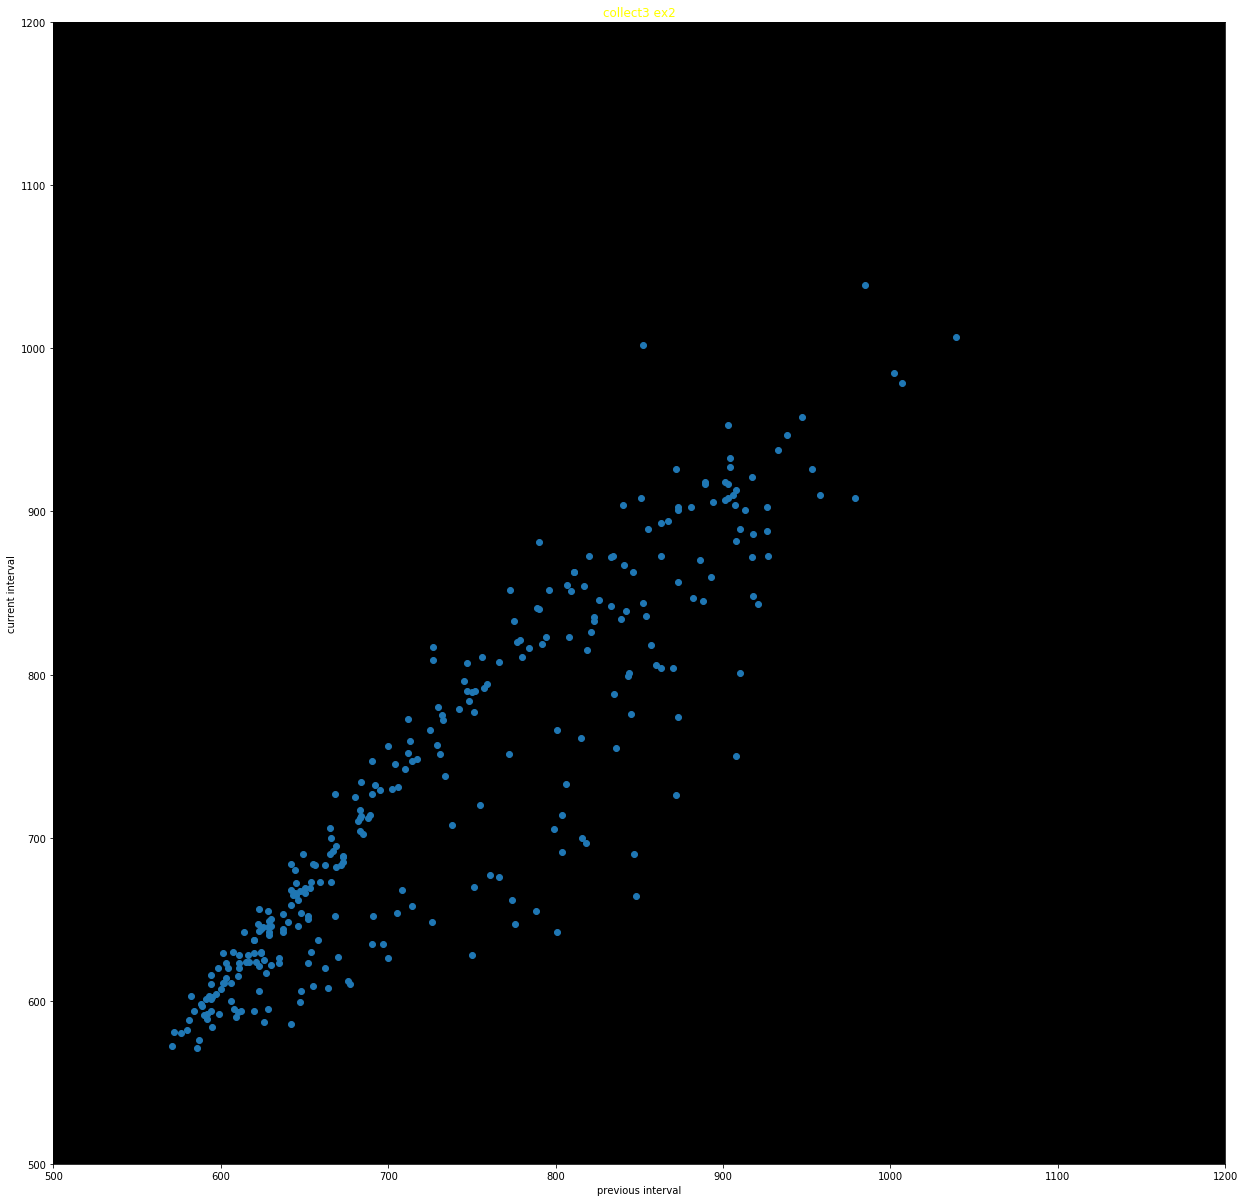

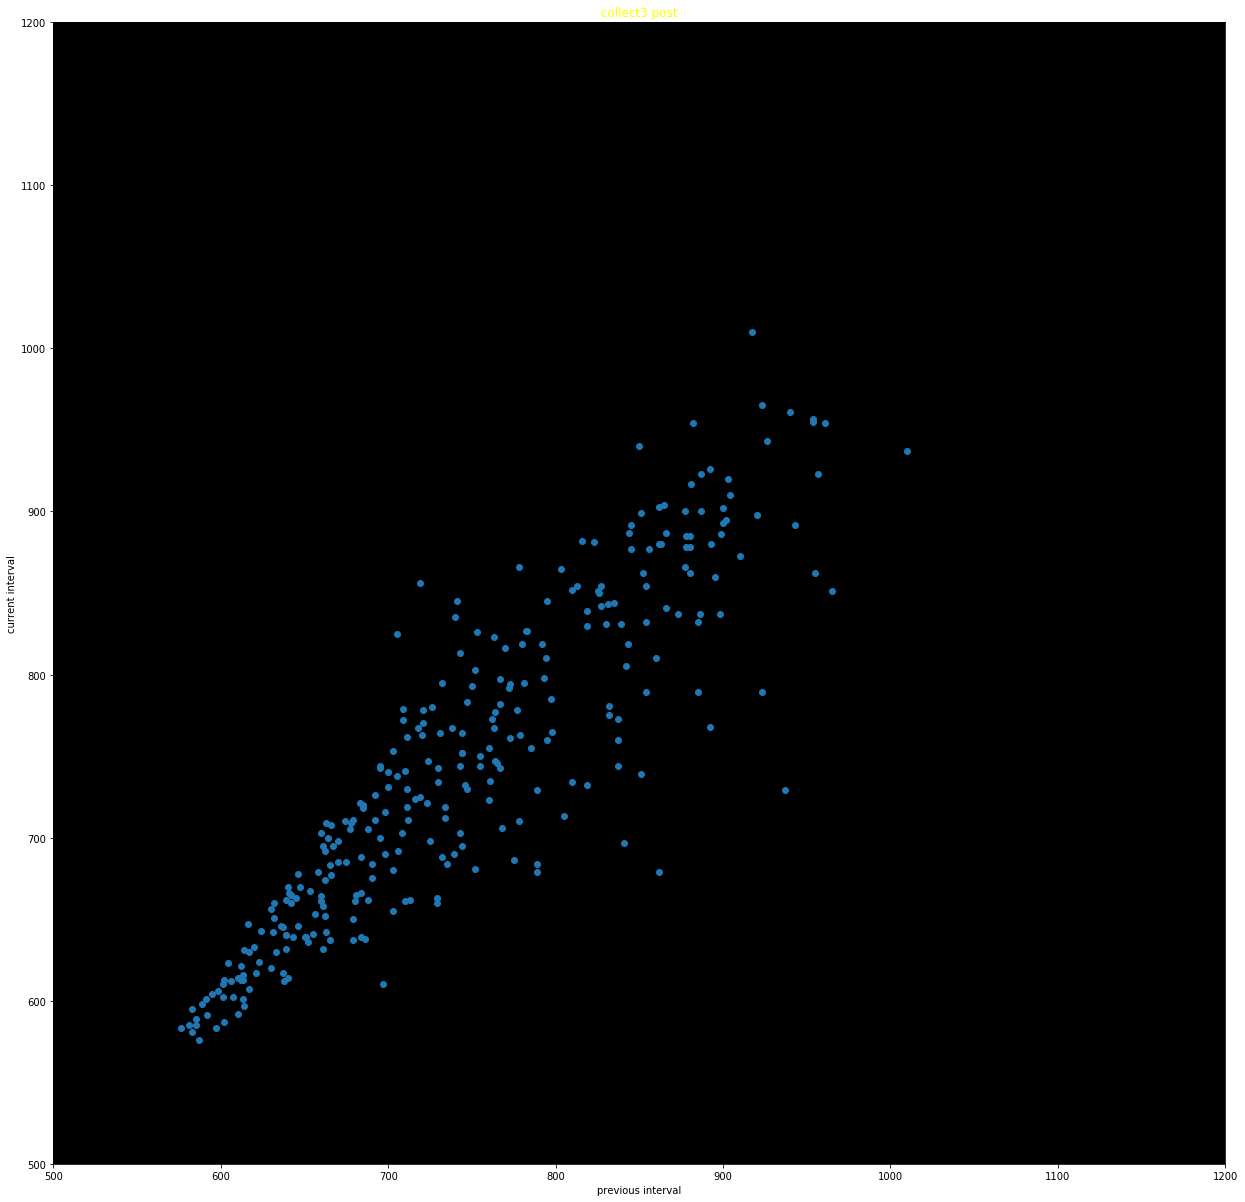

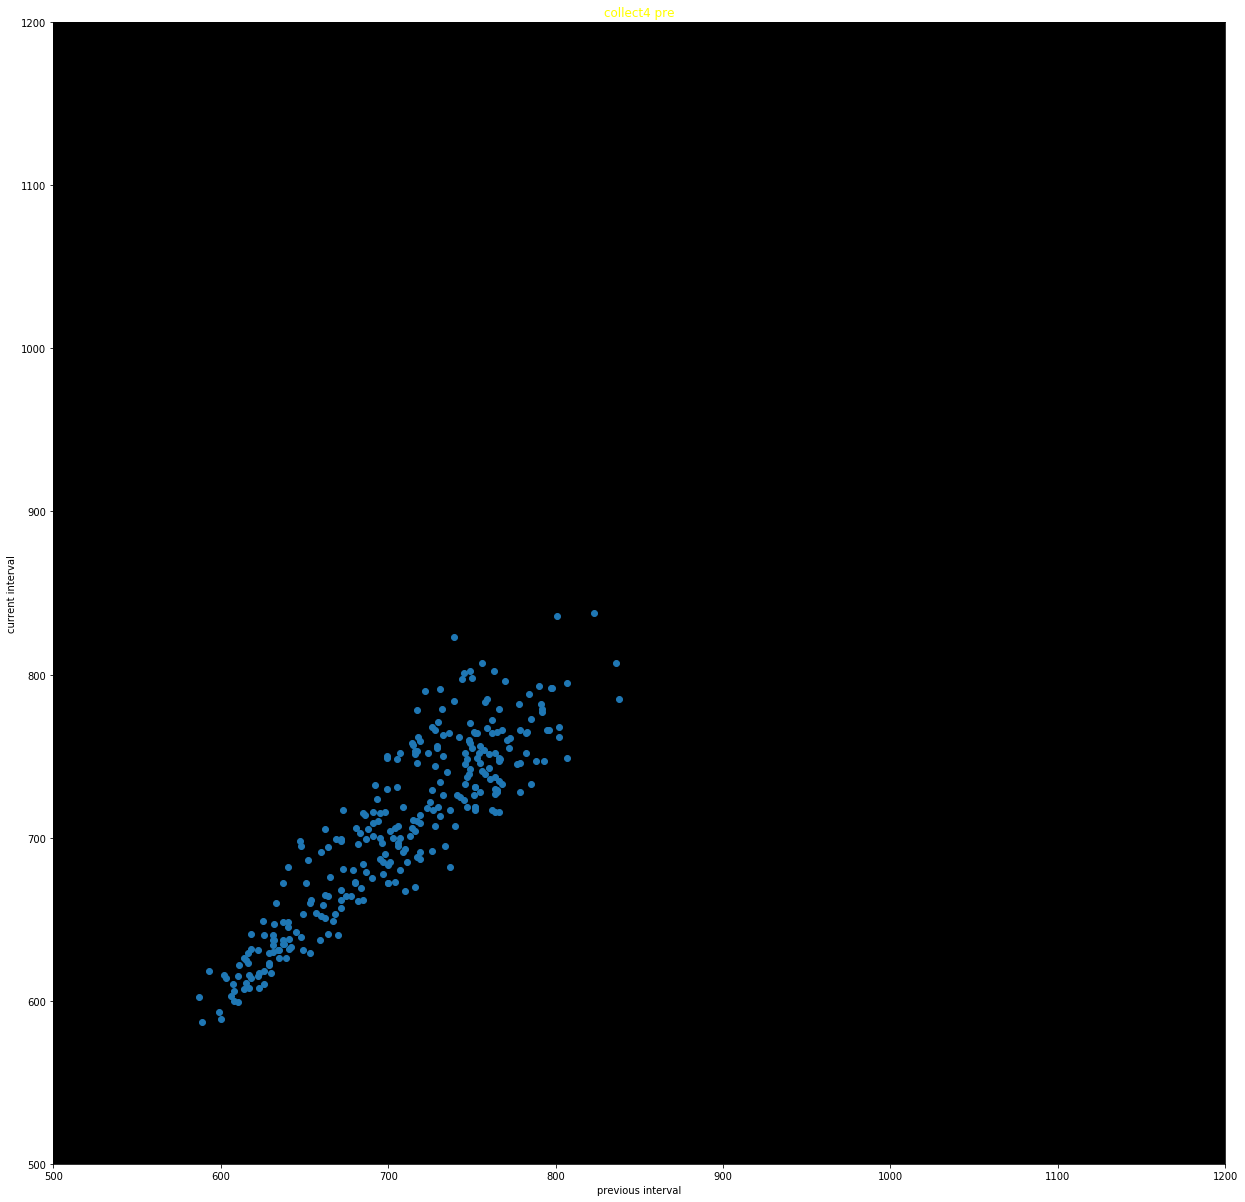

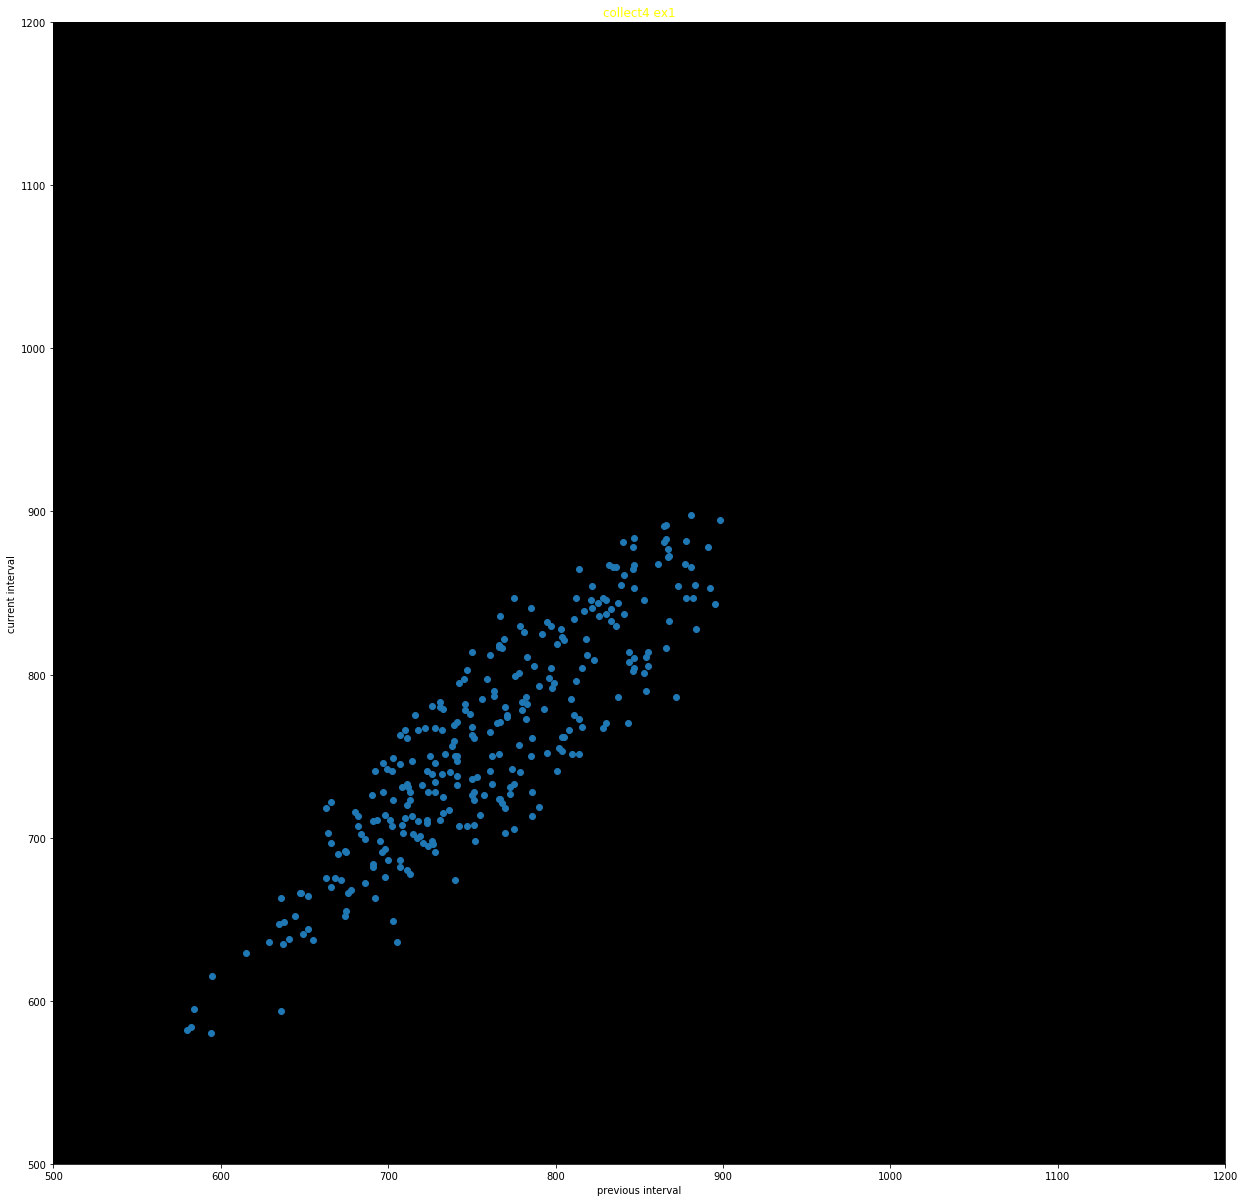

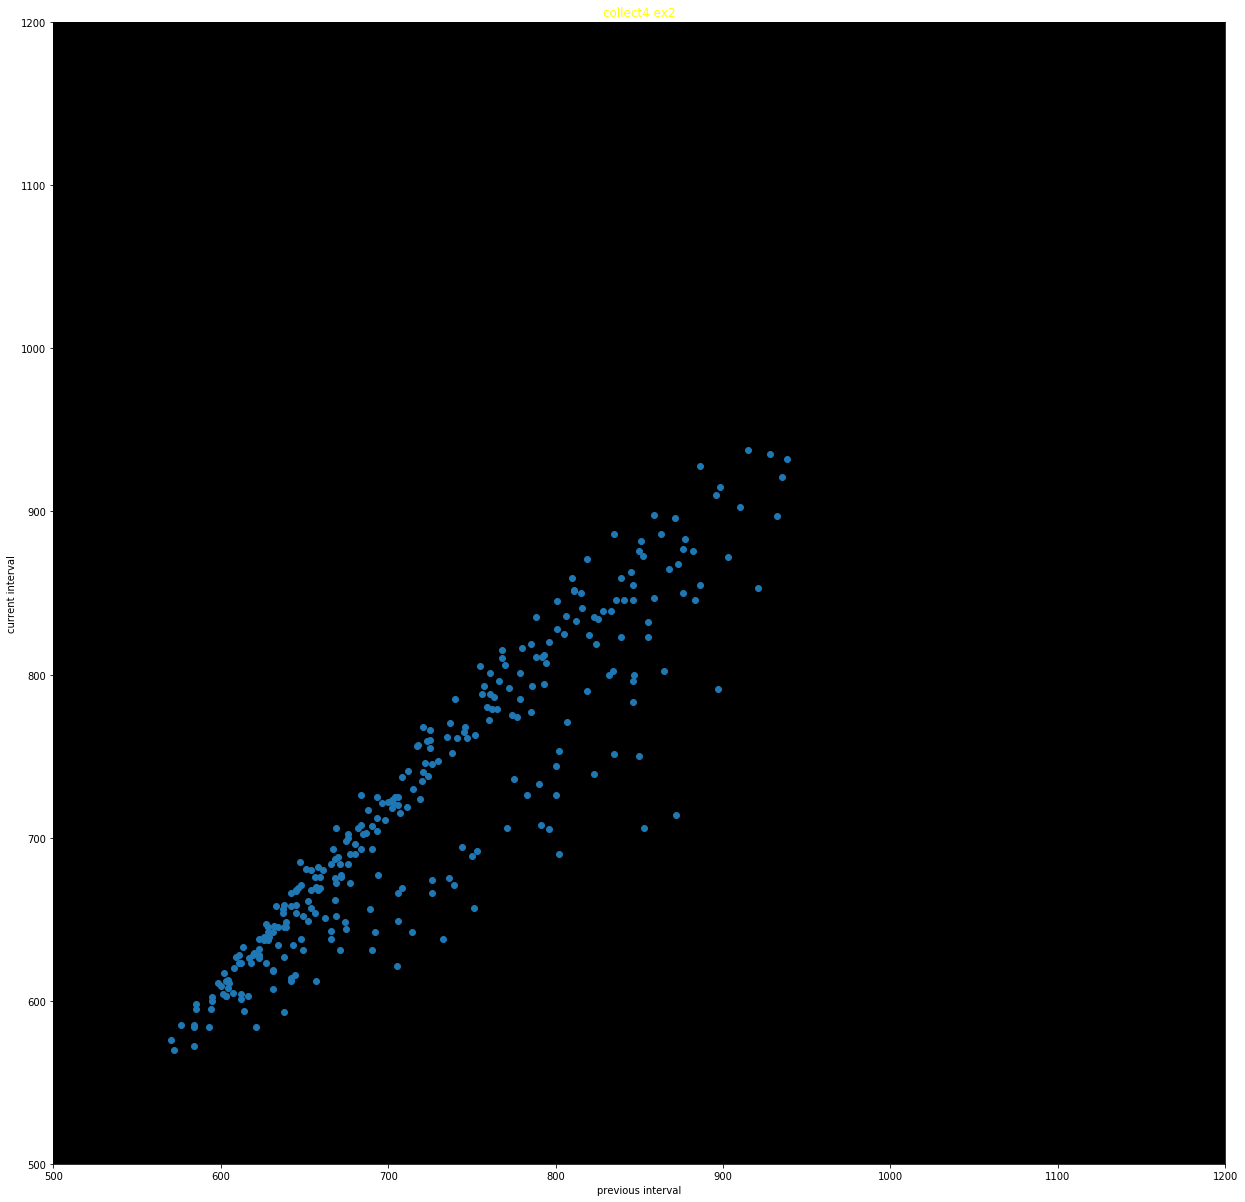

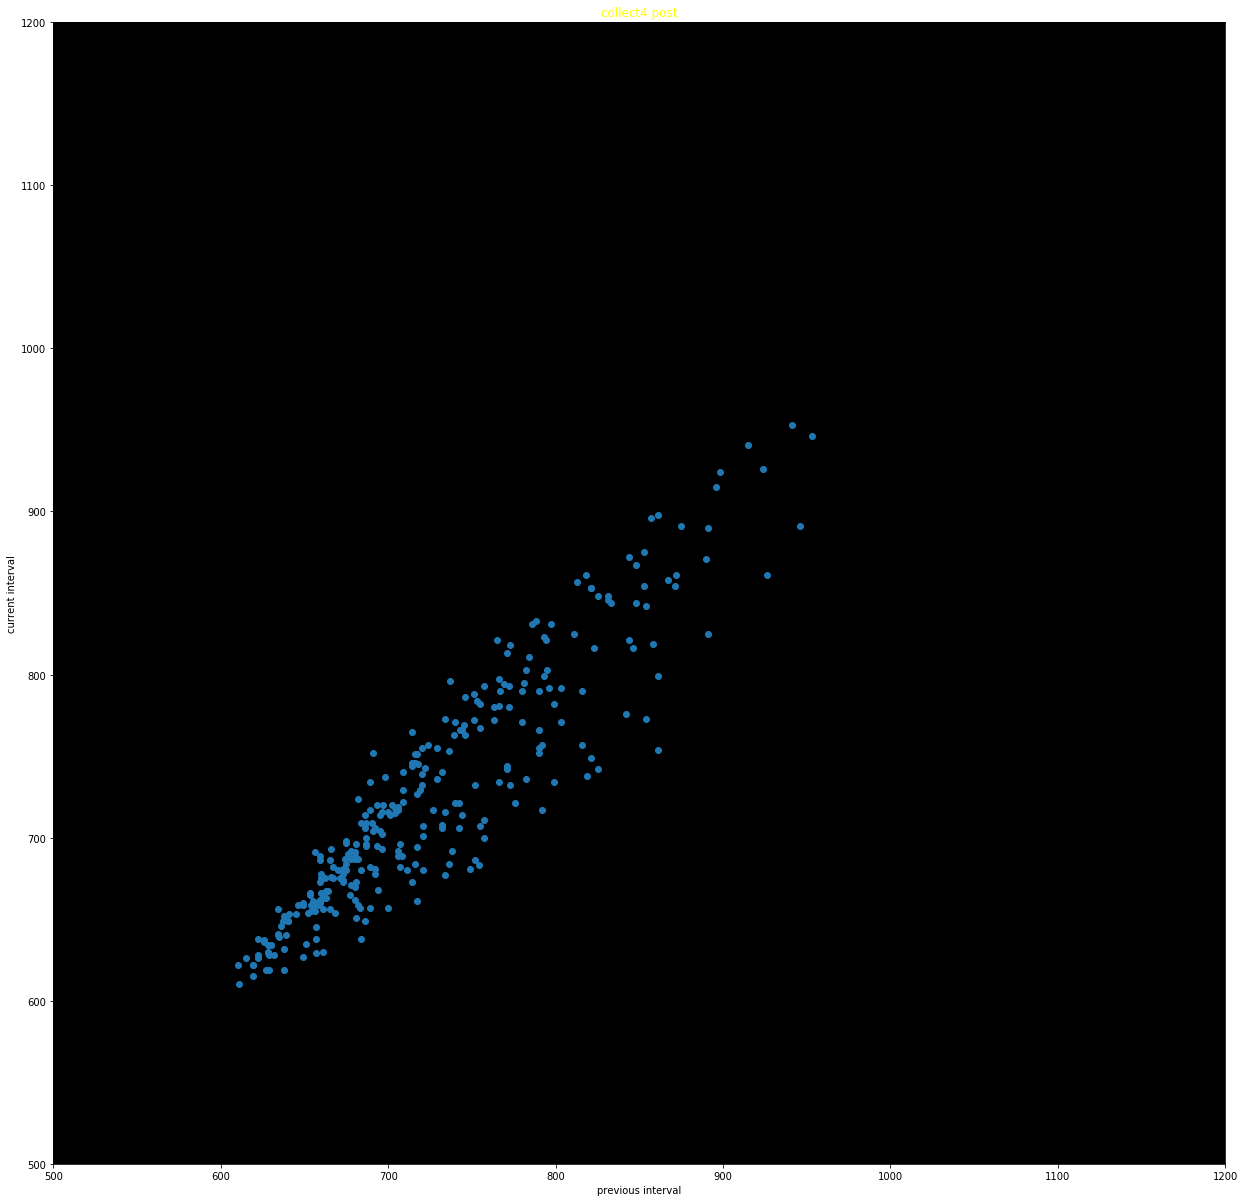

In [189]:
mpl.rc('figure', figsize=(21, 21)) #set figure size
rri_min = 500
rri_max = 1200

#sort keys / put in array manually
for c in collection_keys:
    for k in condition_keys:
        plt.figure()
        plt.scatter(data_df[c][k],data_df[c][k].shift(1))
        plt.xlim(rri_min,rri_max)
        plt.ylim(rri_min,rri_max)
        plt.xlabel('previous interval')
        plt.ylabel('current interval')
        plt.title("{} {}".format(c,k))

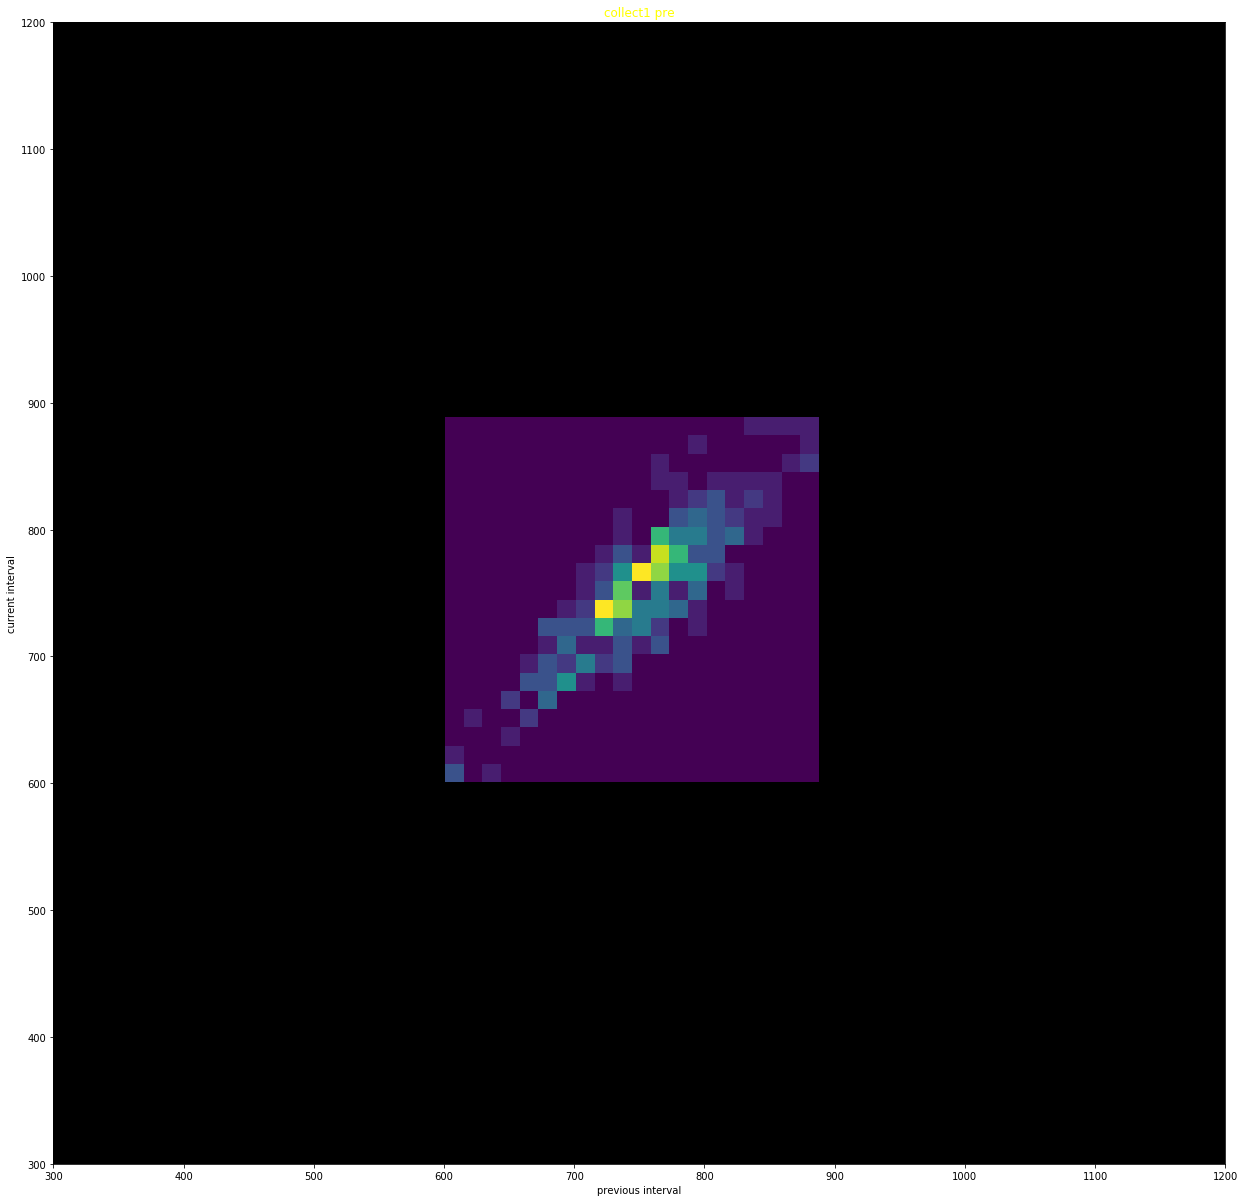

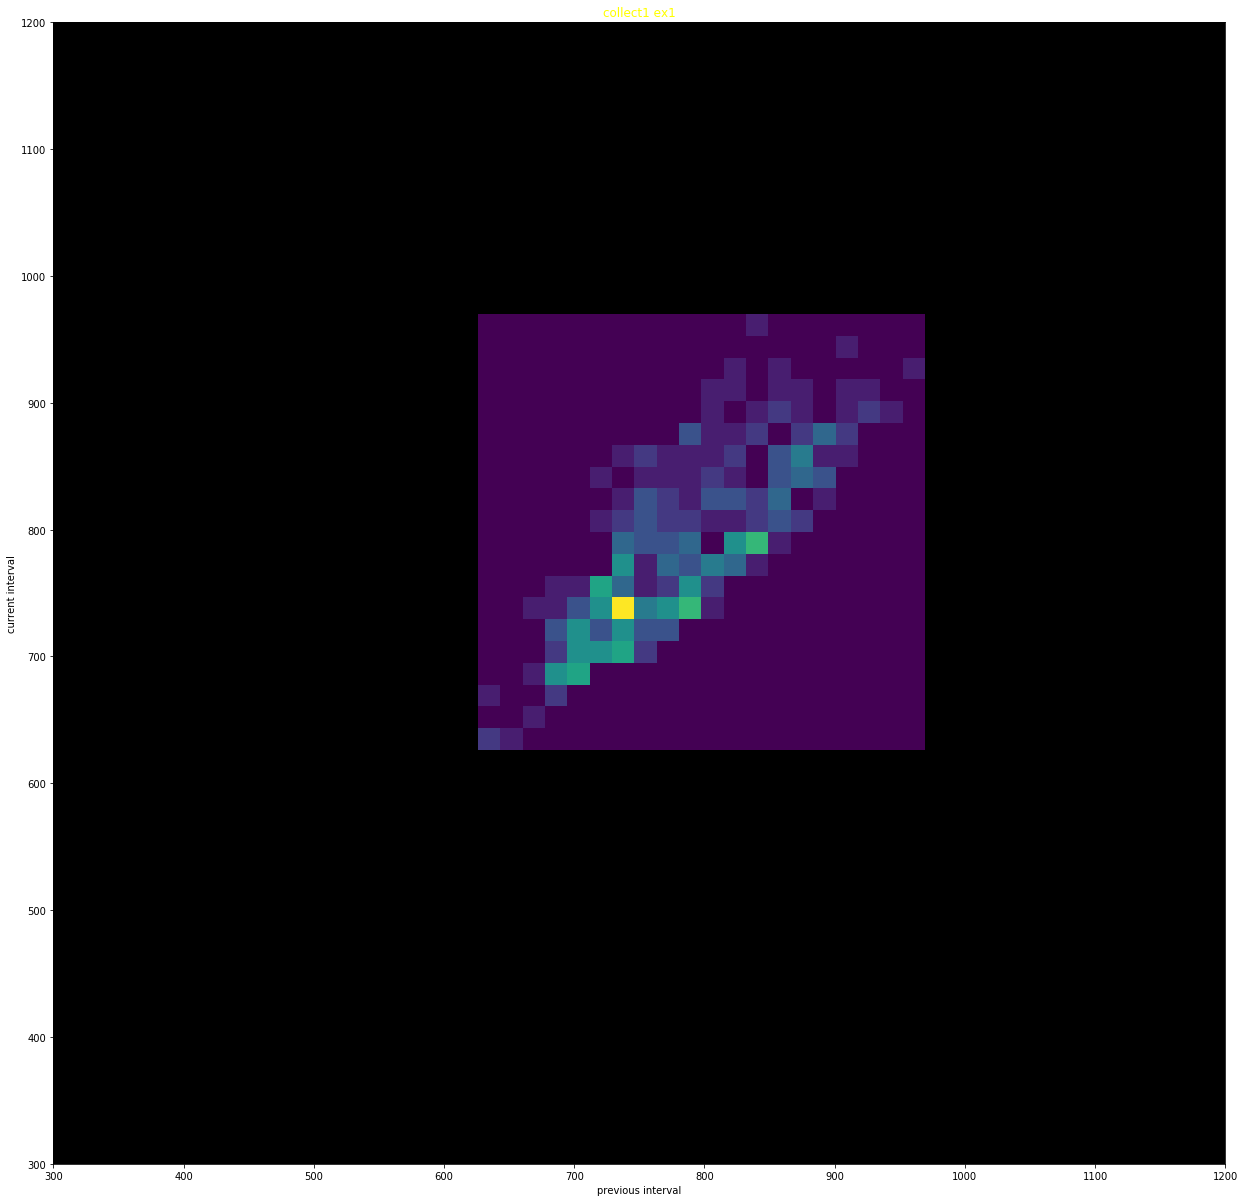

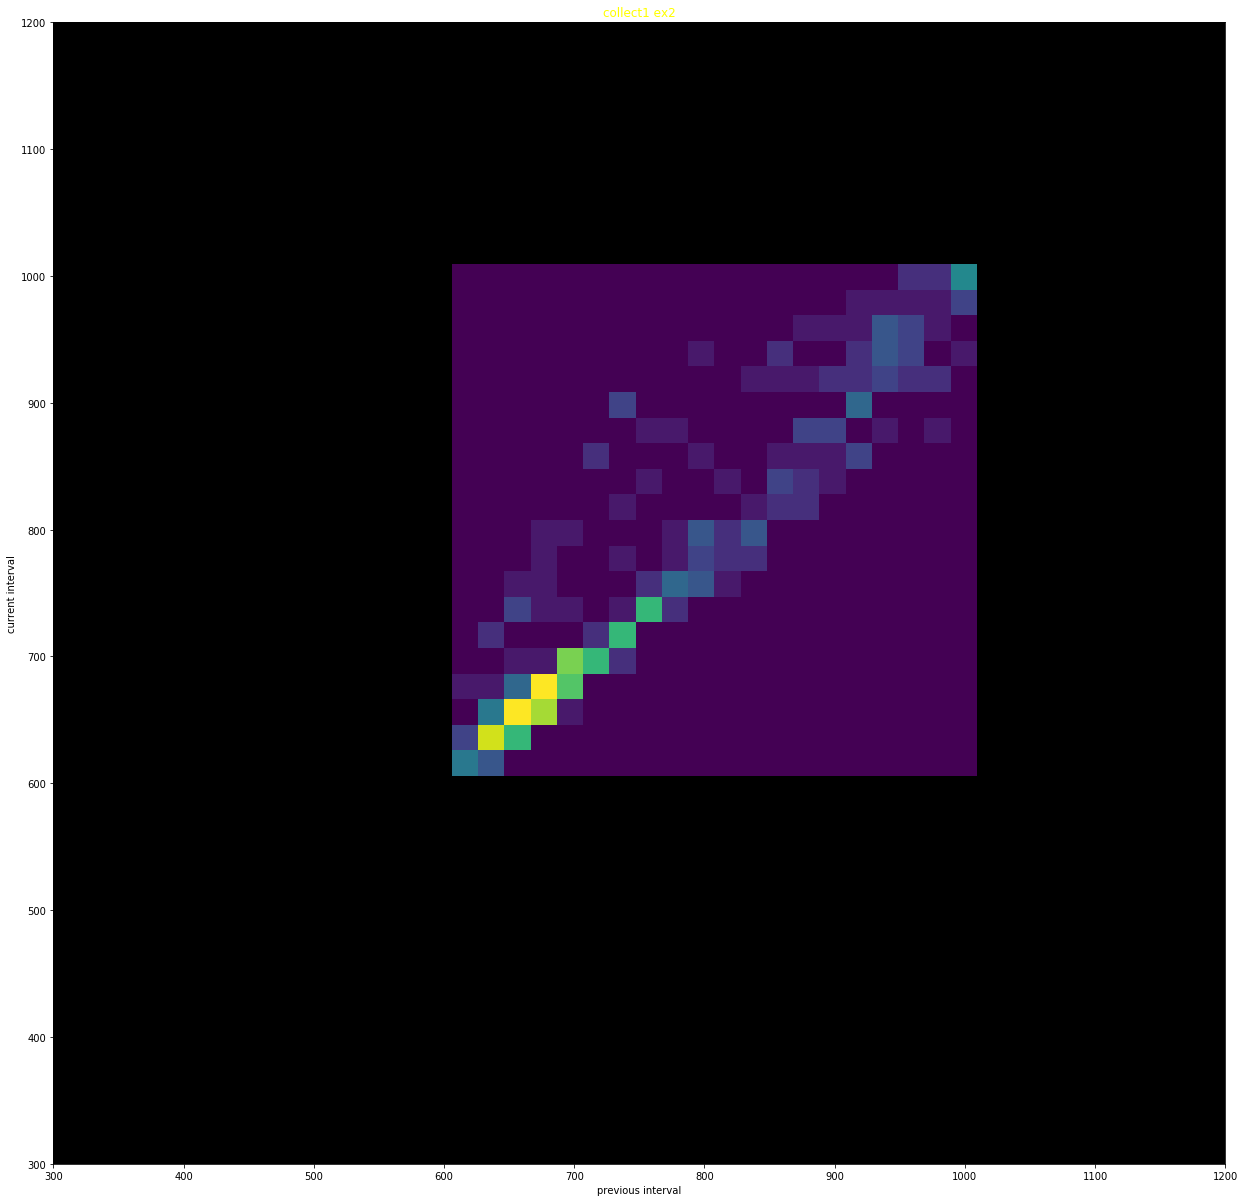

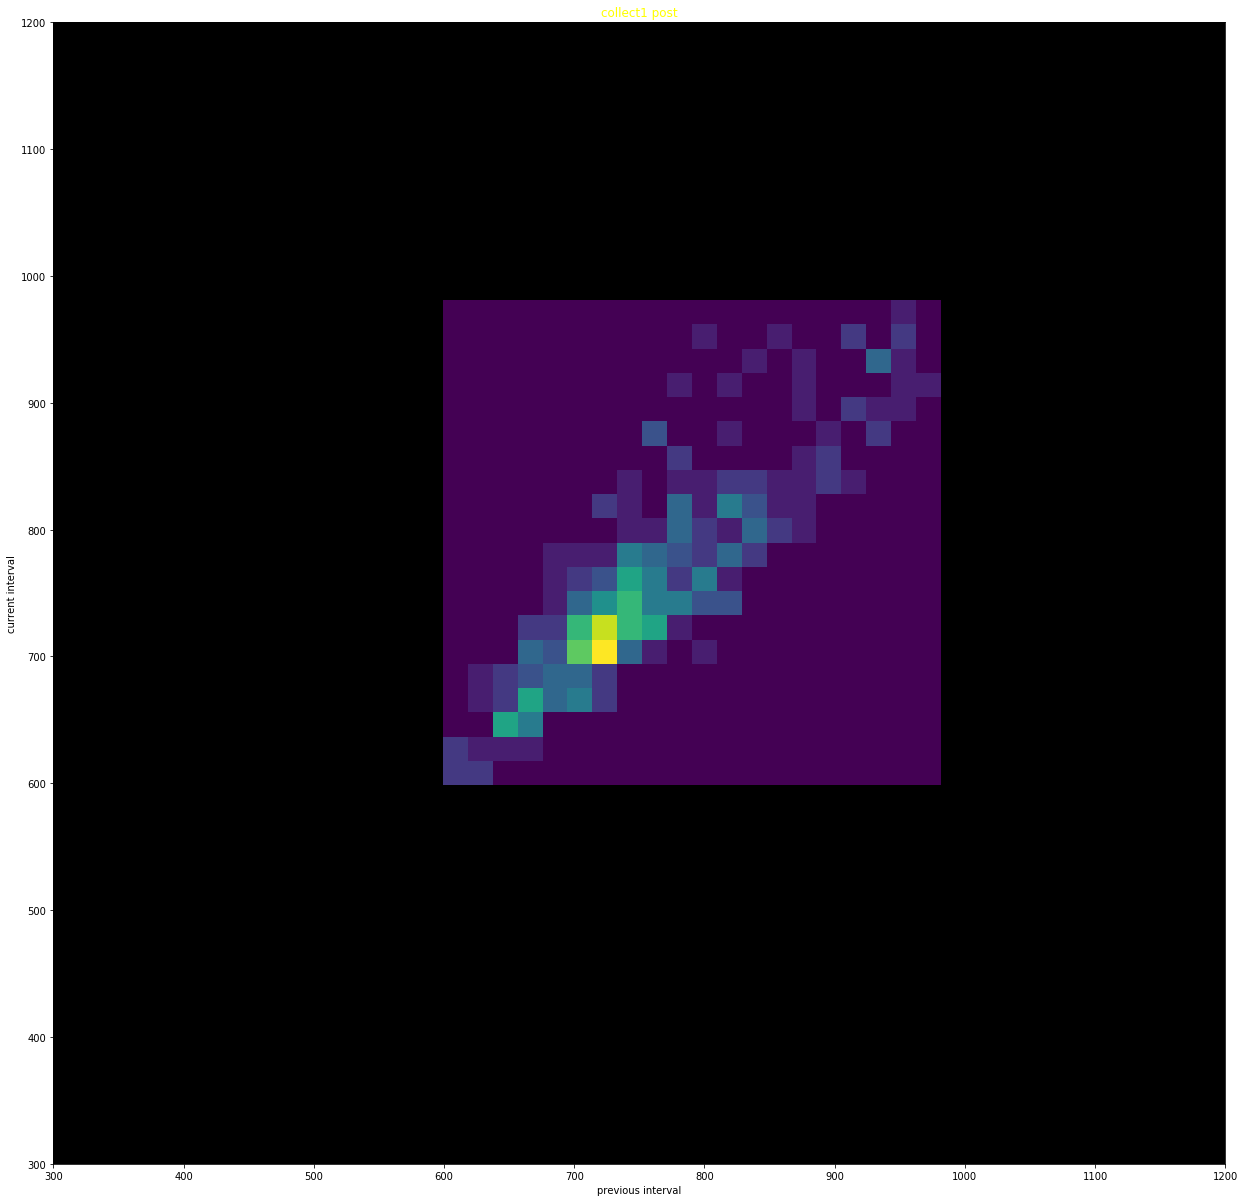

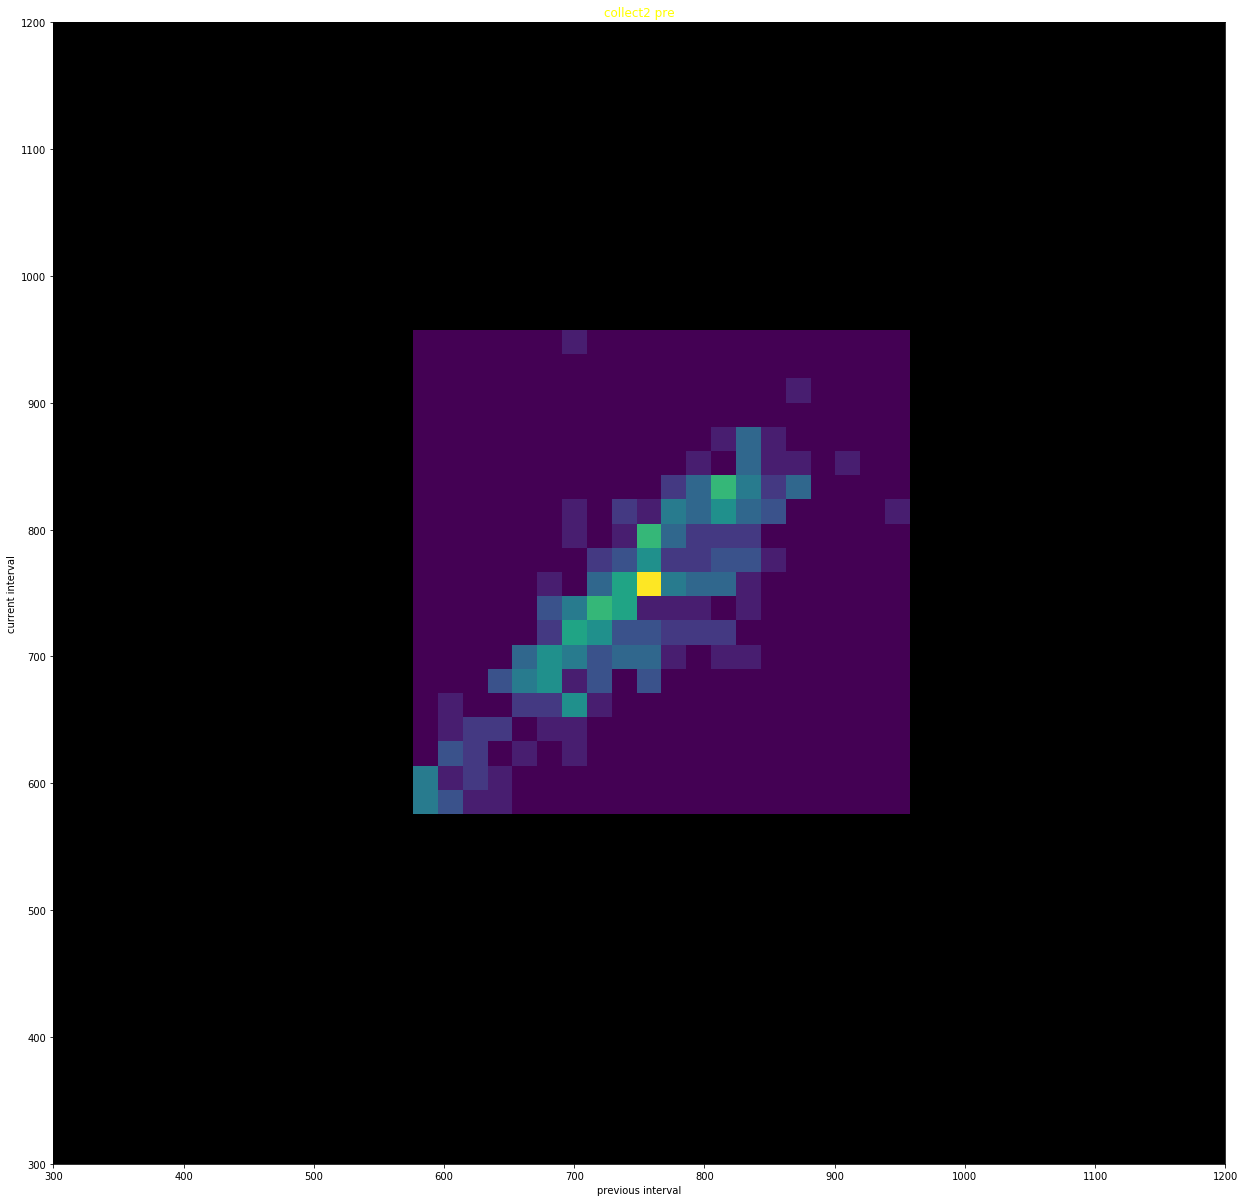

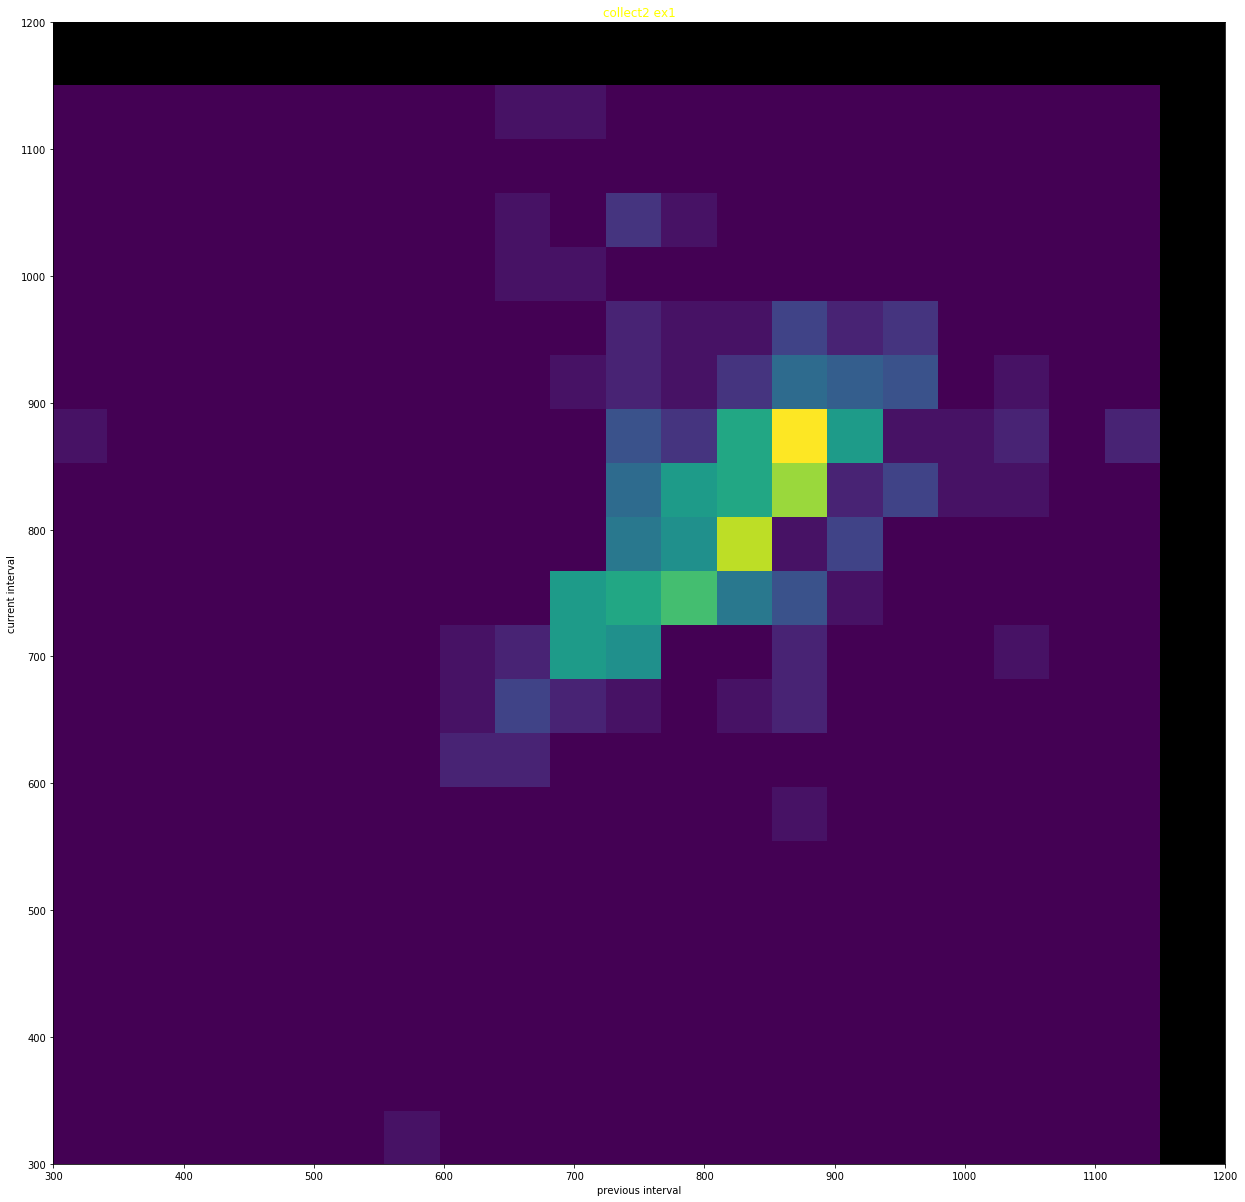

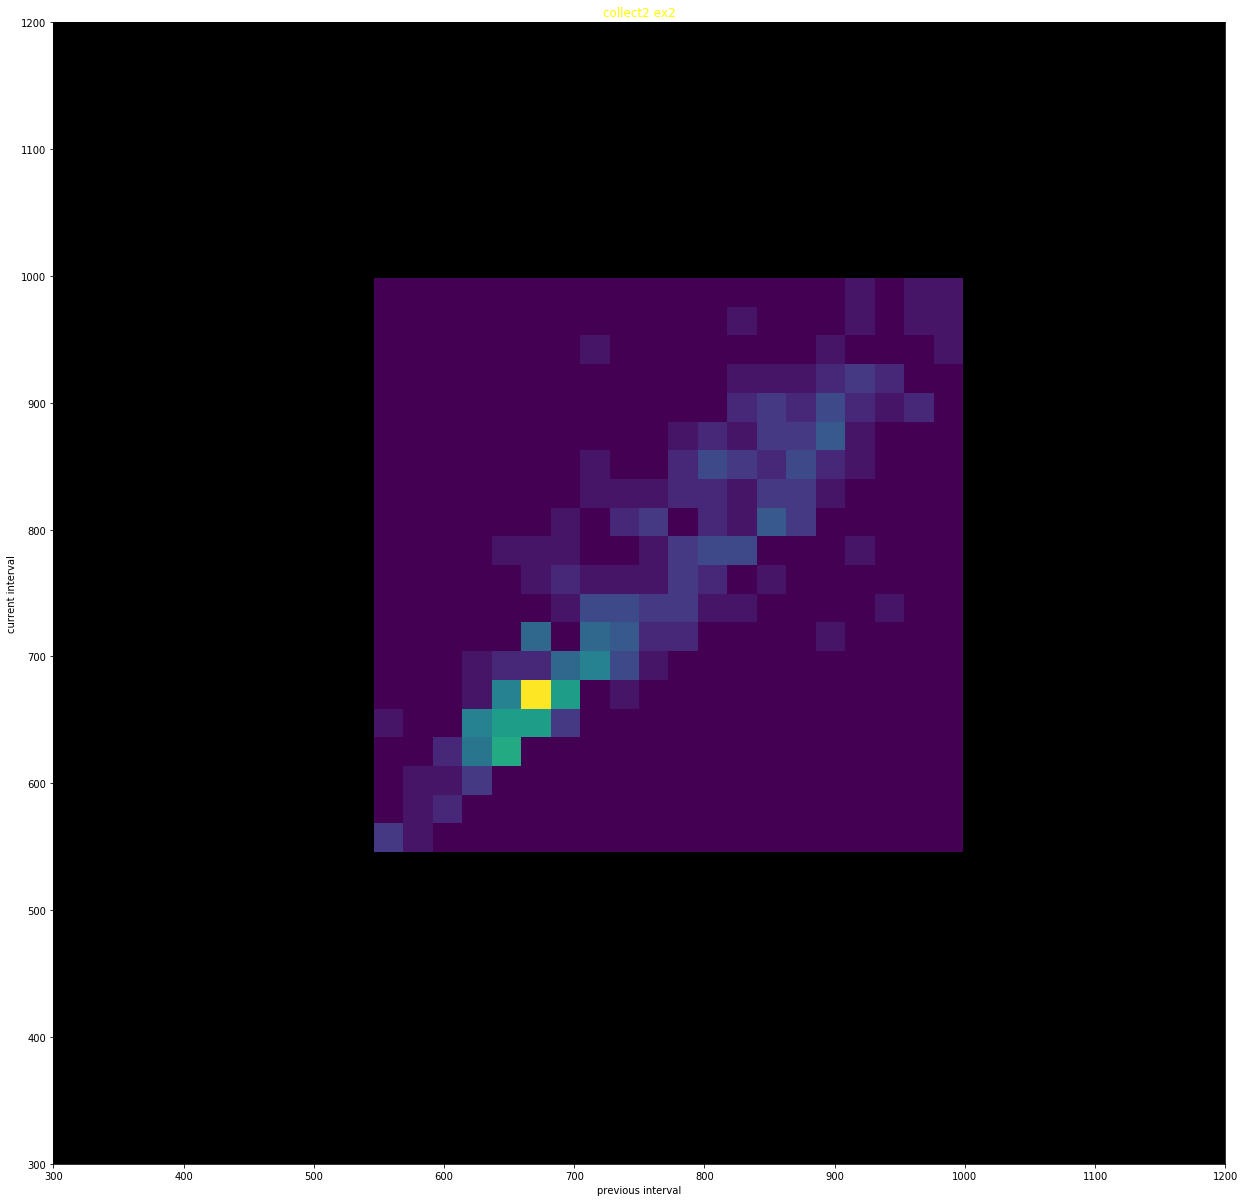

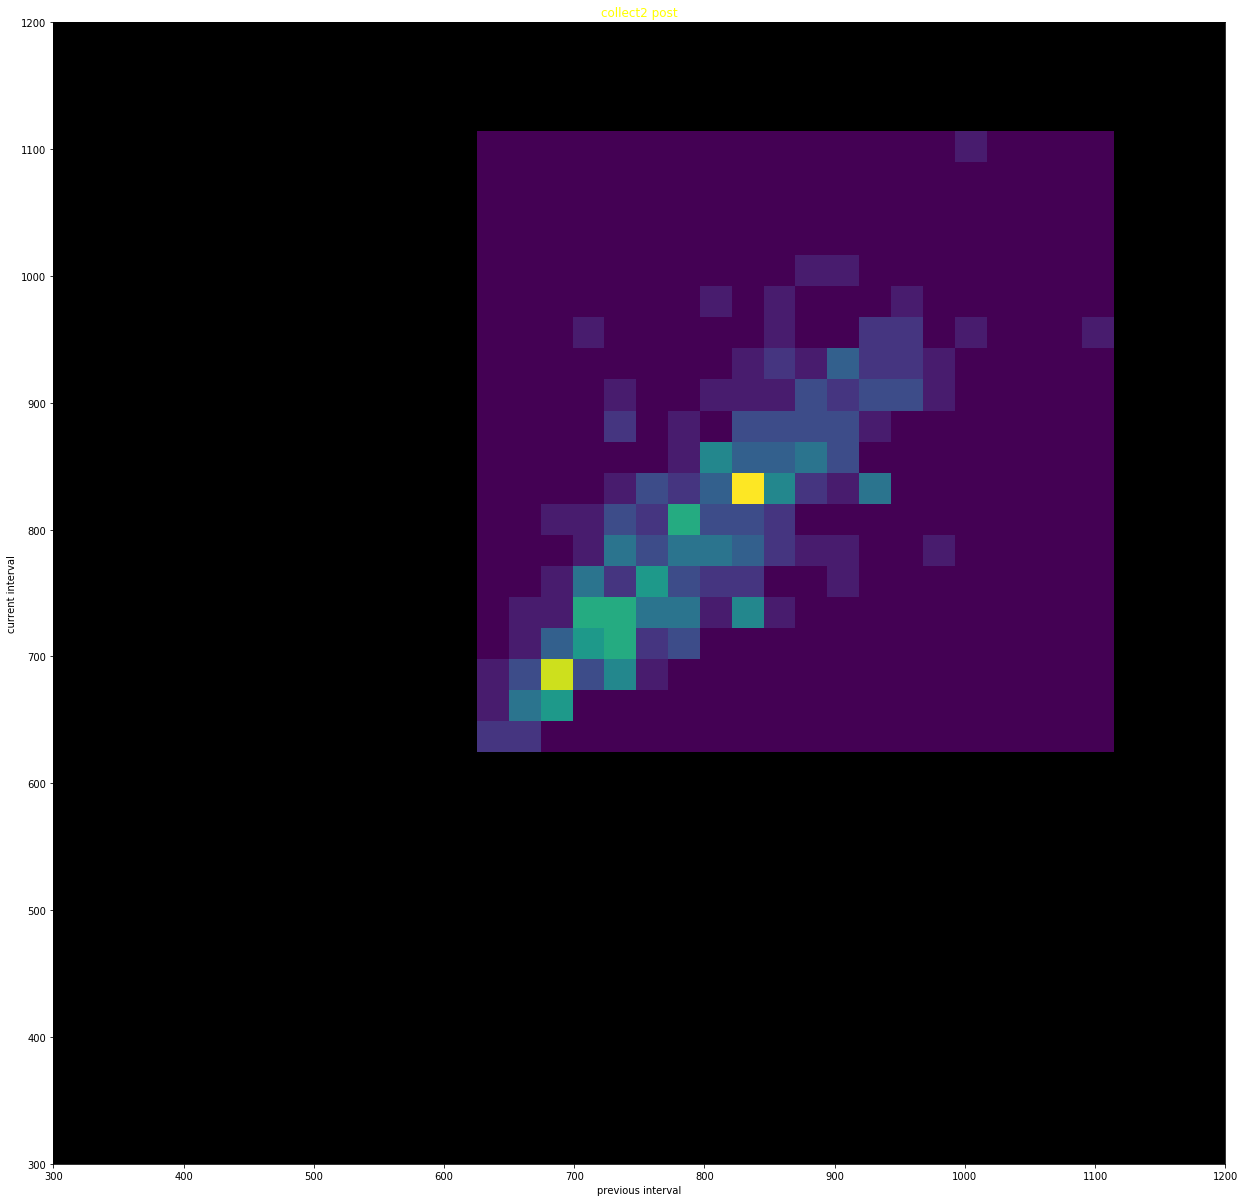

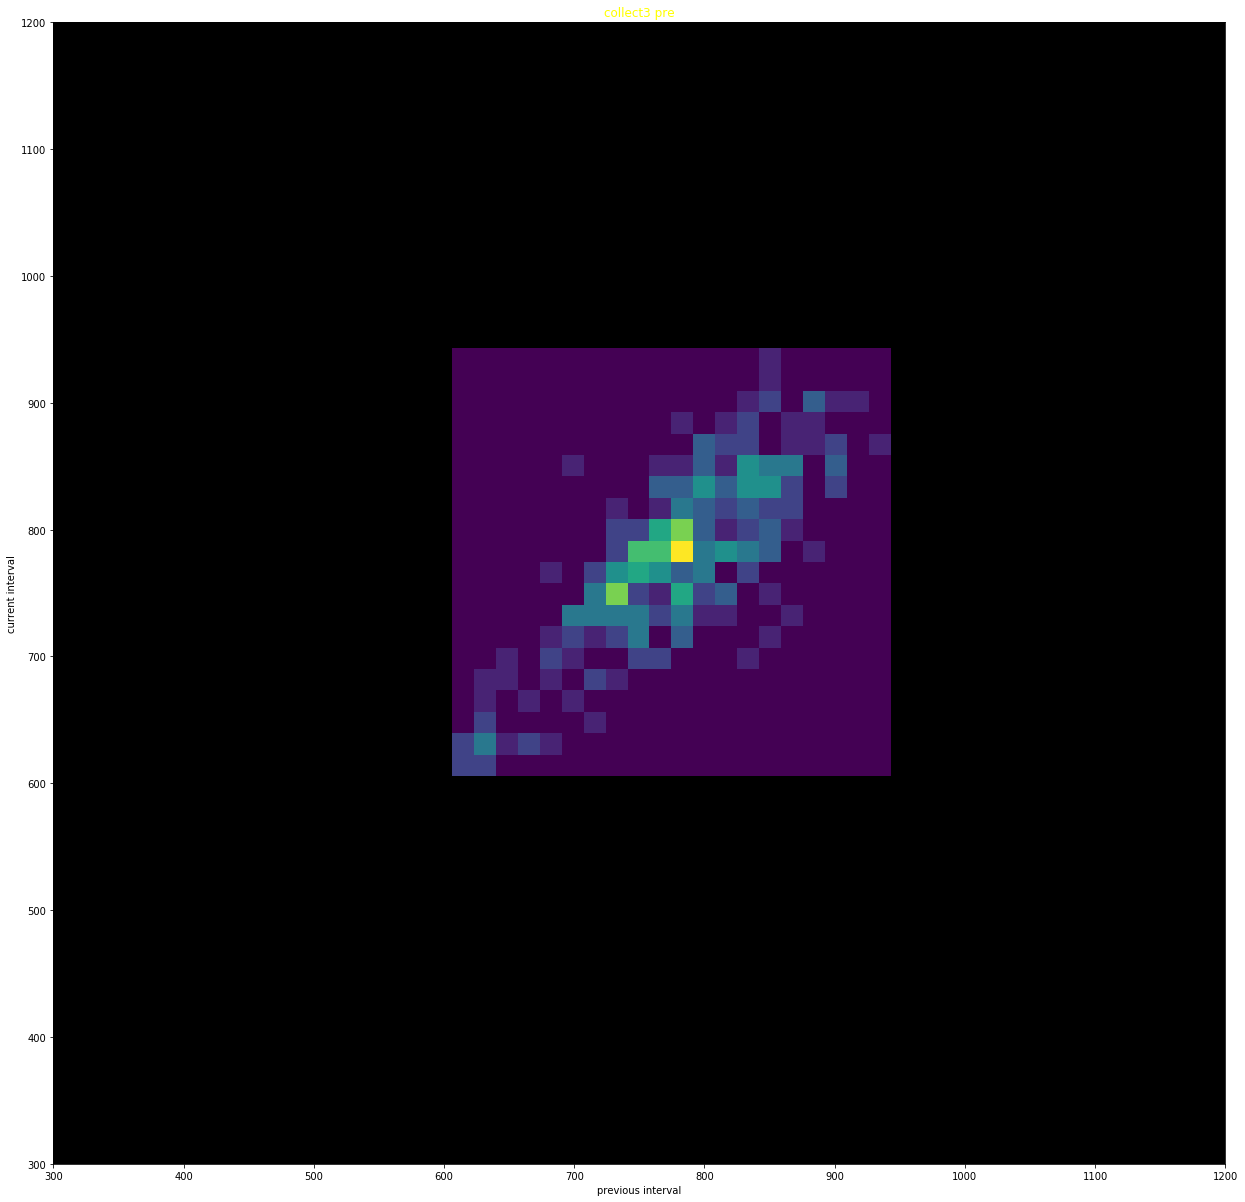

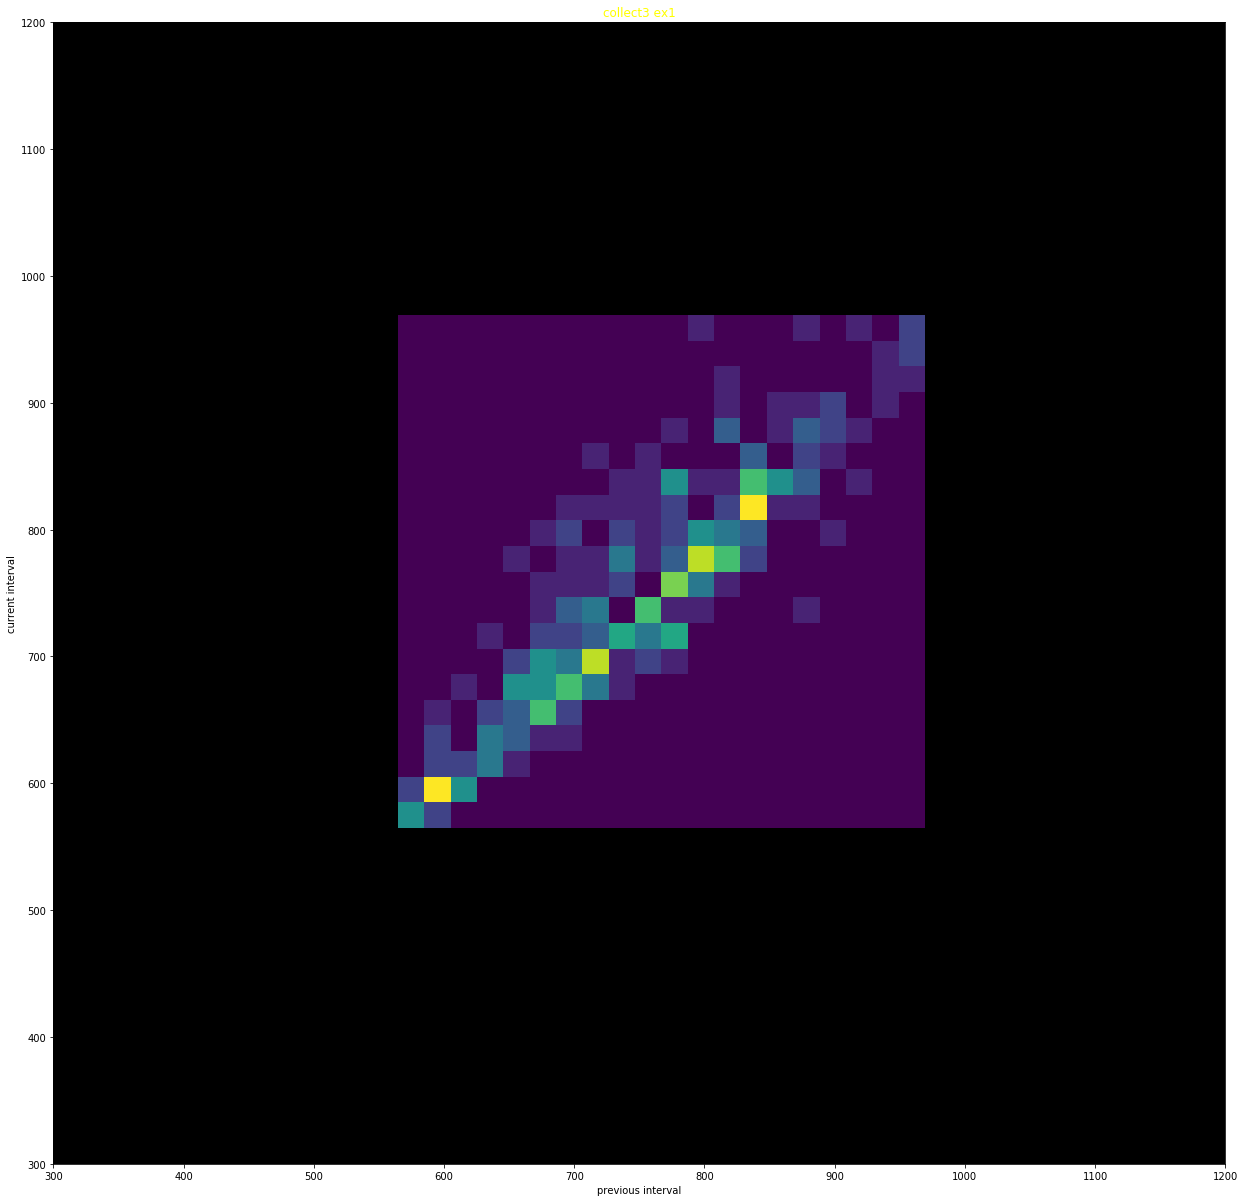

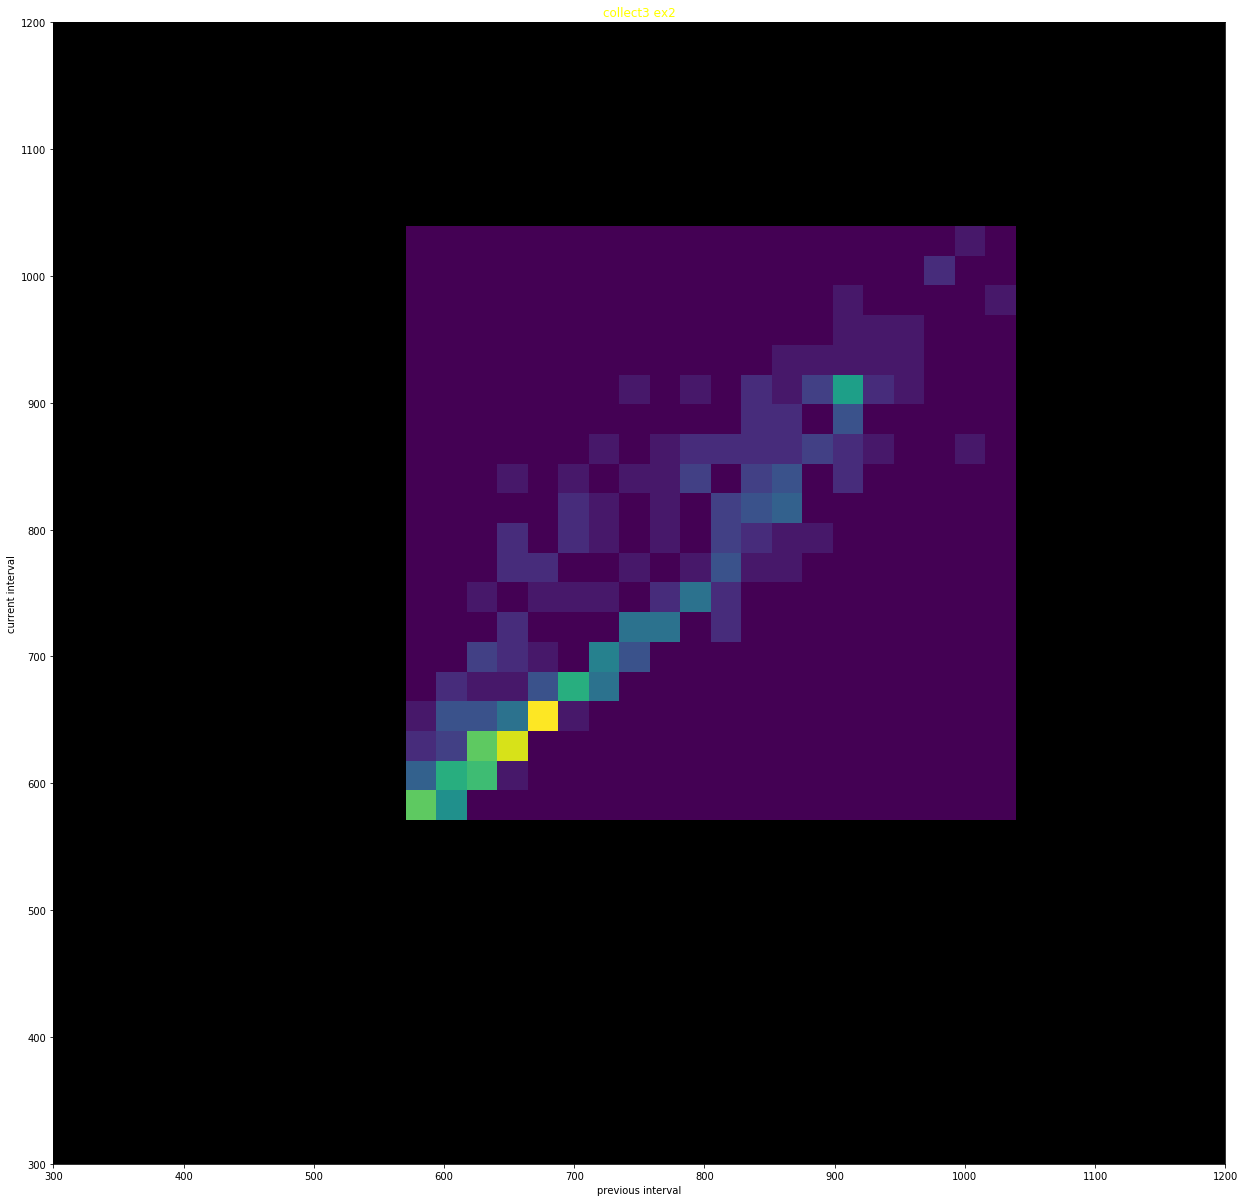

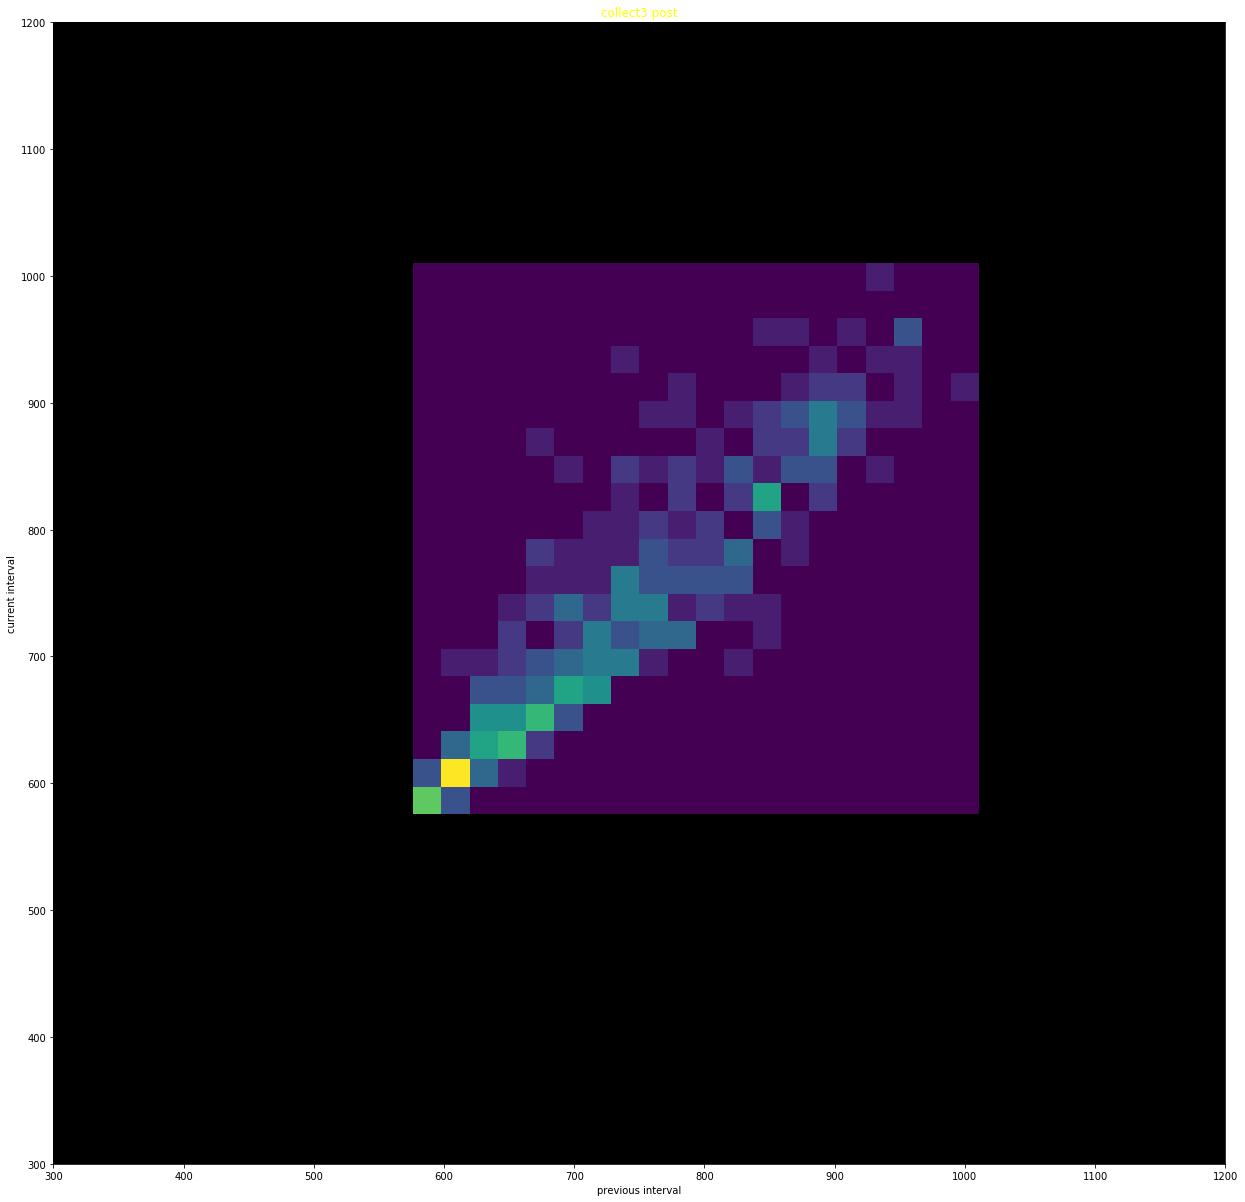

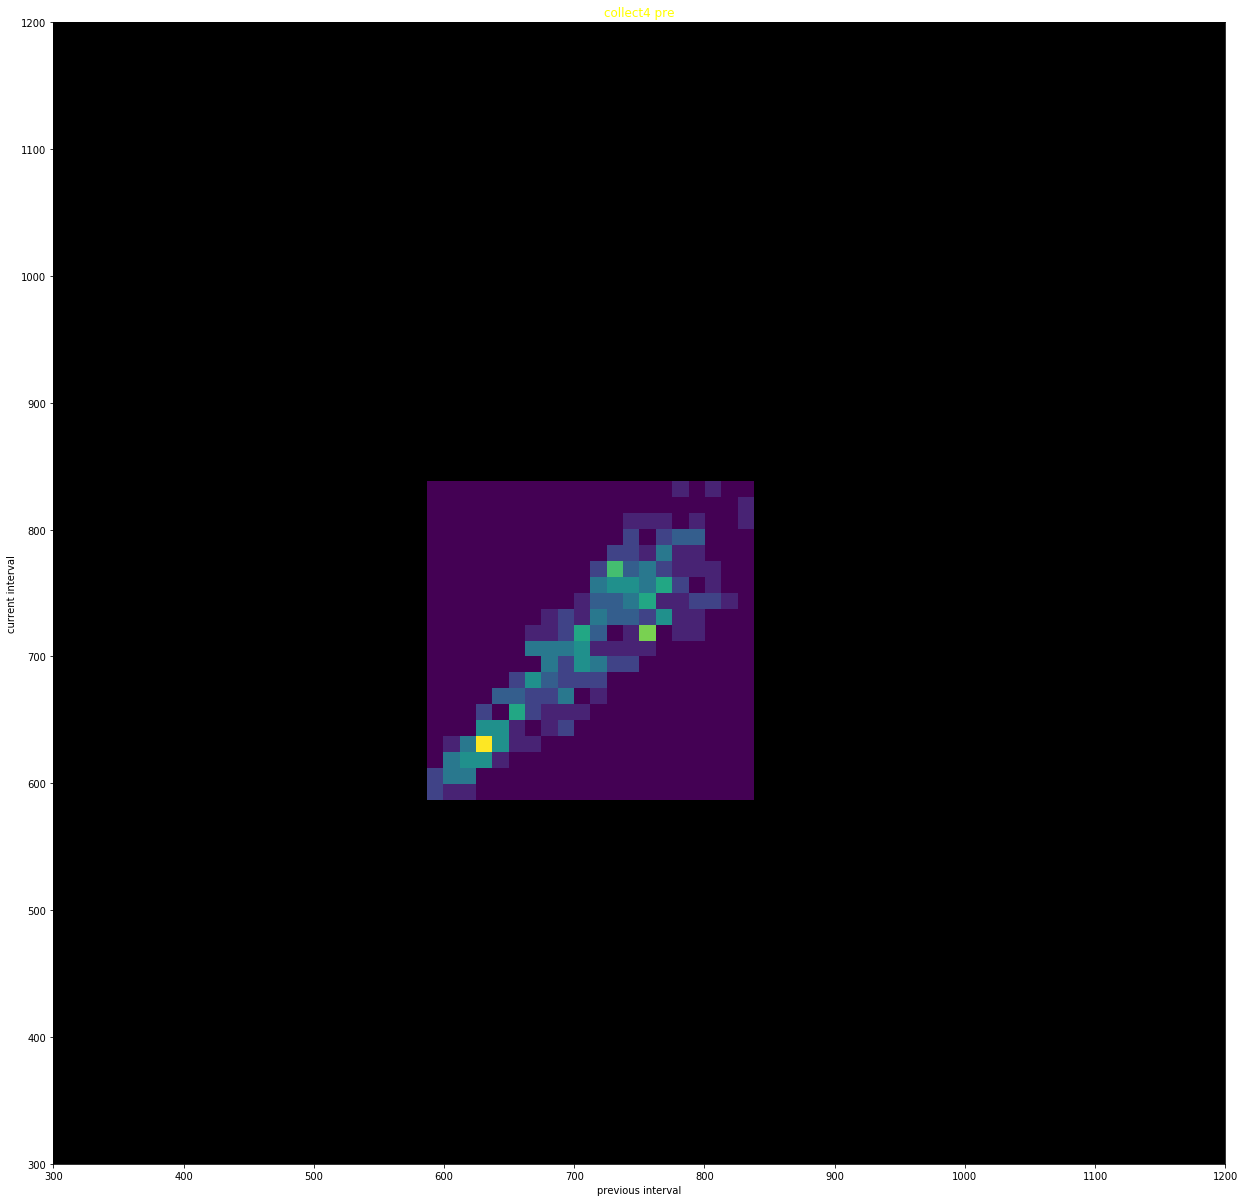

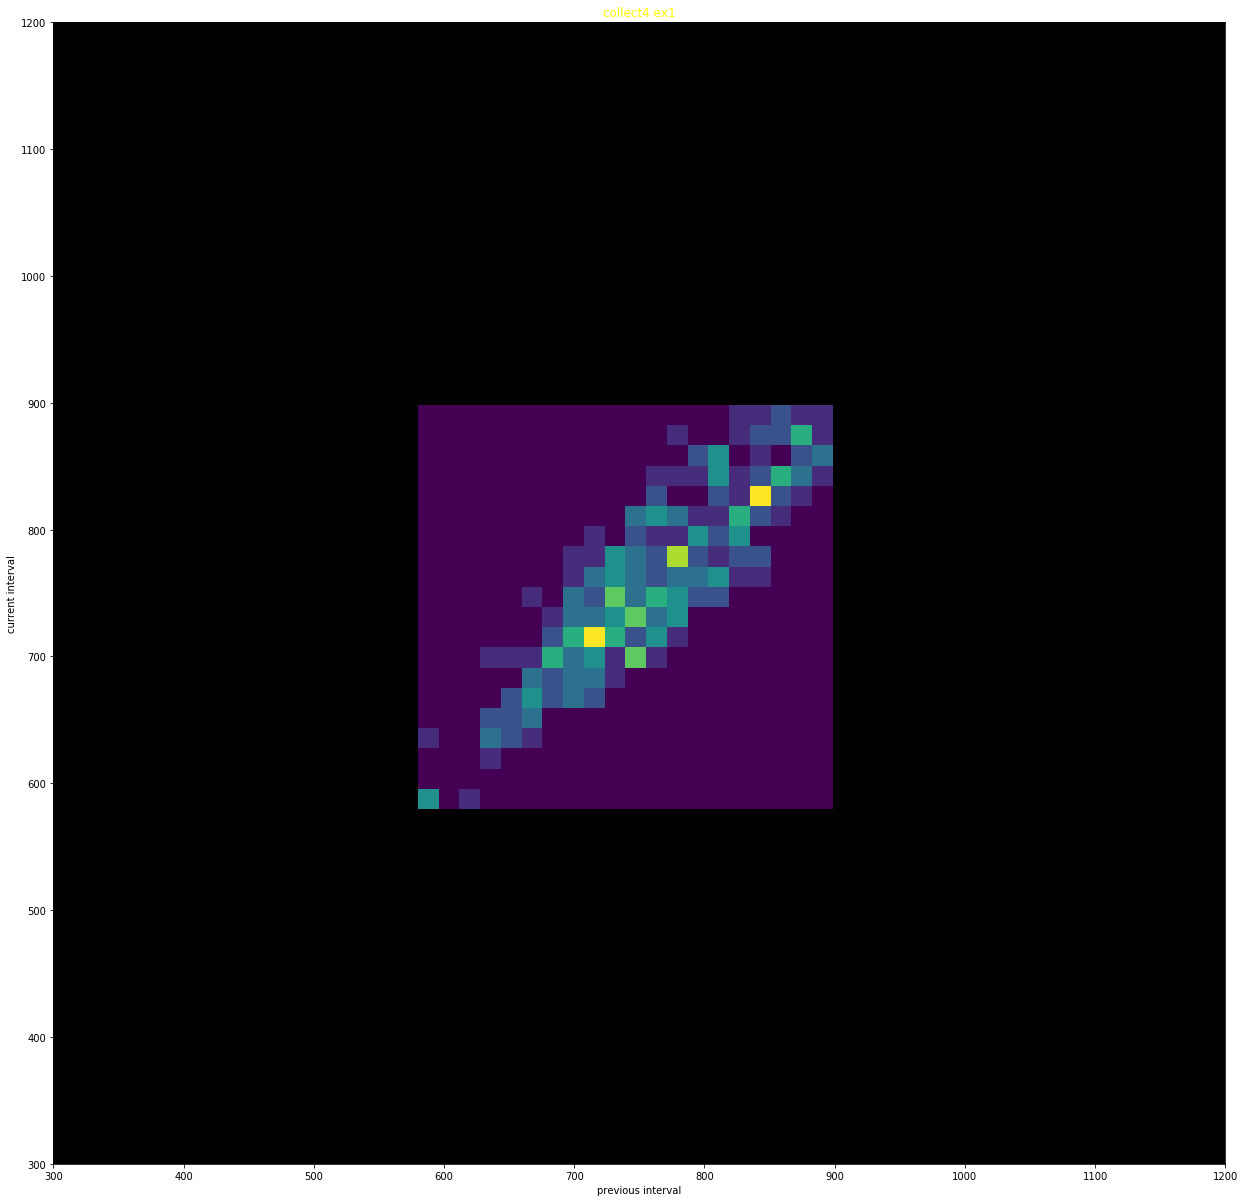

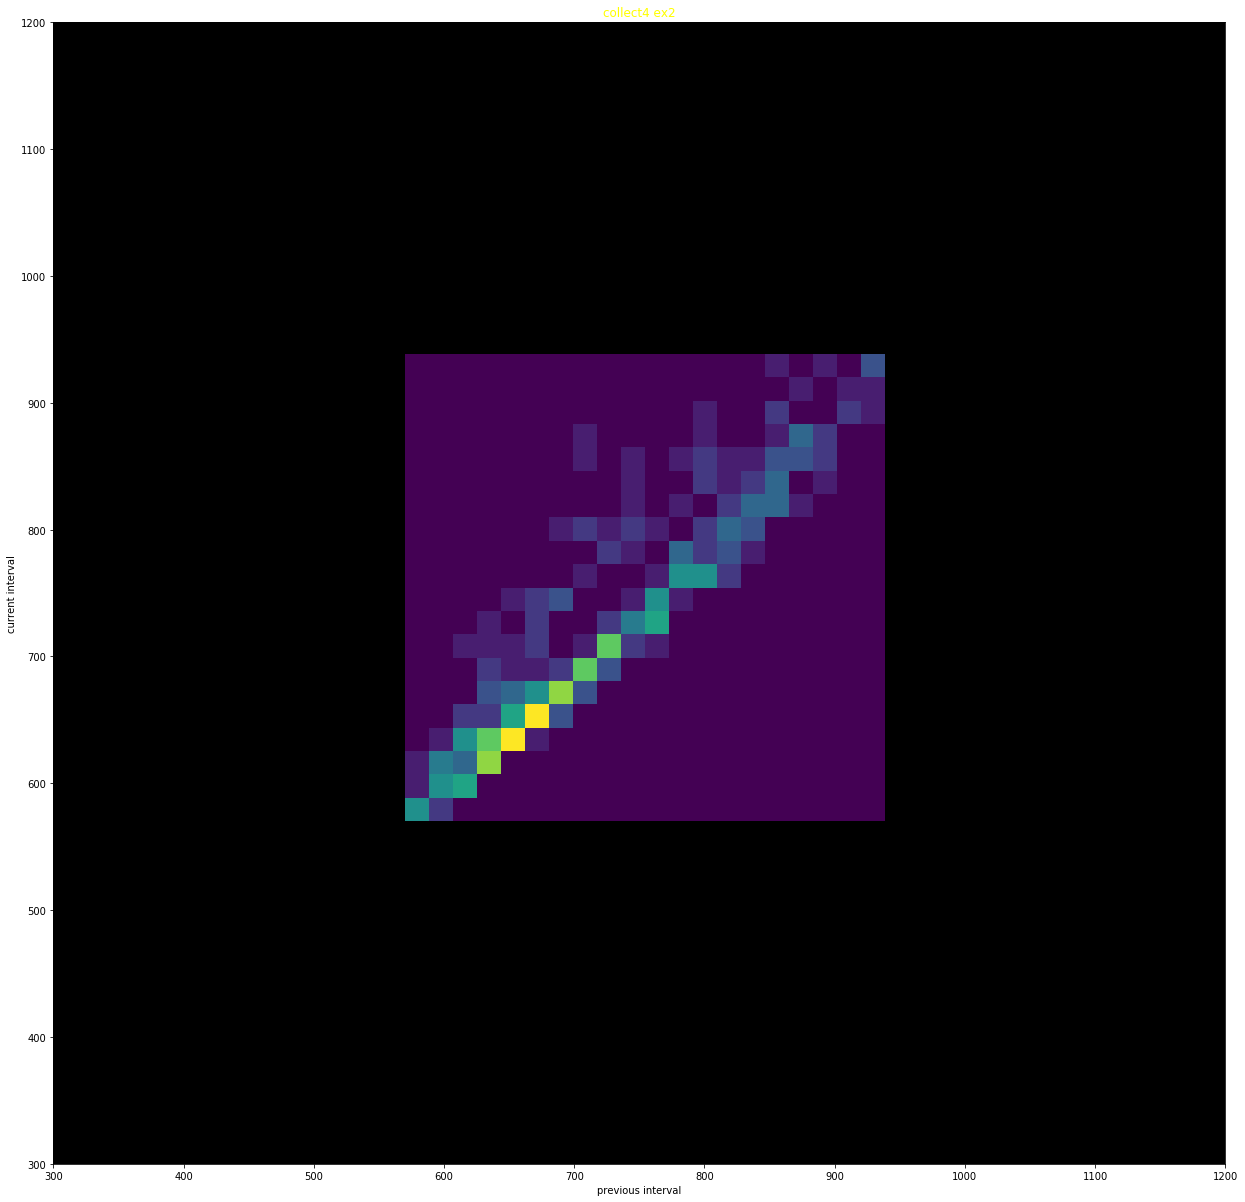

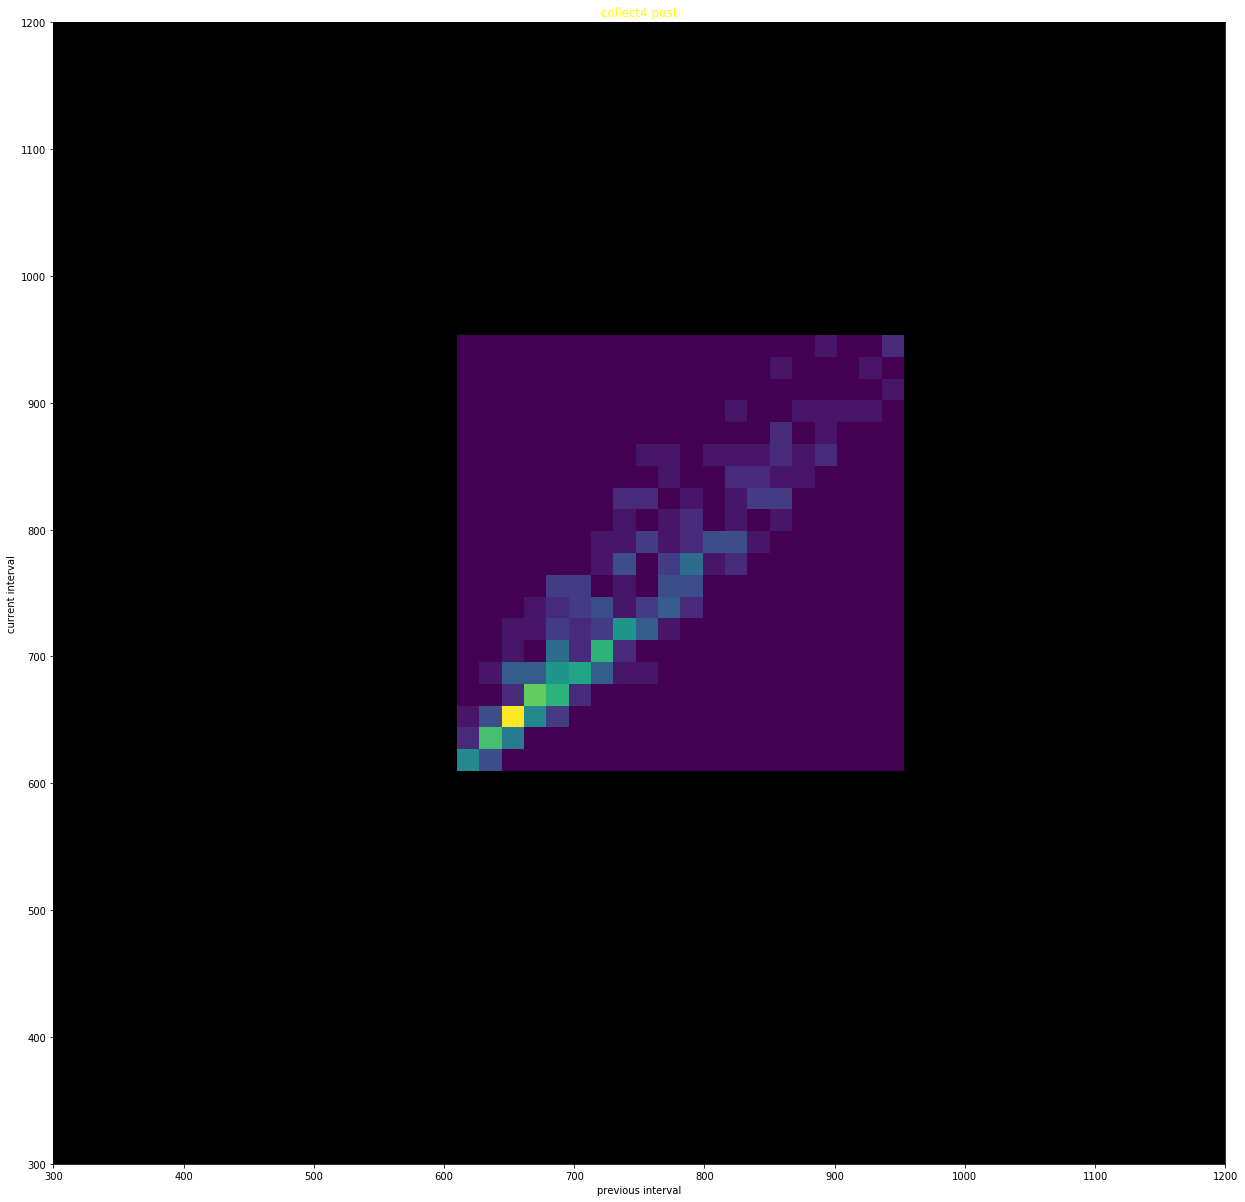

In [190]:
rri_min = 300
rri_max = 1200

for c in collection_keys:
    for k in condition_keys:
        plt.figure()
        plt.hist2d(data_df[c][k][:-1],data_df[c][k][1:],bins=20);
        plt.xlabel('previous interval')
        plt.ylabel('current interval')
        plt.title("{} {}".format(c,k))#         
        plt.xlim(rri_min,rri_max)
        plt.ylim(rri_min,rri_max)

## Outlier in collection 2, ex1 is causing issues... lets prune it
#### Rerun cells above

In [191]:
print(data_df['collect2'].min())
print(data_df['collect2'].idxmin())
data_df['collect2']['ex1'][28]
data_df['collect2']['ex1'][28] = (data_df['collect2']['ex1'][27] + data_df['collect2']['ex1'][29])/2
data_df['collect2']['ex1'][28]

pre     576
ex1     299
ex2     546
post    625
dtype: int64
pre      37
ex1      28
ex2      73
post    197
dtype: int64


731

# Homework (student exercises)

## statistical tests (e.g. t-test)
    within each collect (aggregate RRIs)
    across multiple collects (aggregate the outputs 
## box plot
## categorization (use sci-kit learn)
## freq domain HRV 
## visualization 
    e.g.: extension of Poincare: current vs weighted average of previous several values
    e.g.2: visualize in freq domain PSD
## threshold crossing: play with when do you shift into another state